# Clonar Repositório

In [ ]:
# !git clone https://github.com/tmp1986/ML_CS_PREDICTOR_PYTHON.git
!git clone https://github.com/Fernando-S/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB.git

Cloning into 'ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB'...
remote: Enumerating objects: 726, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 726 (delta 47), reused 83 (delta 37), pack-reused 620
Receiving objects: 100% (726/726), 46.83 MiB | 22.45 MiB/s, done.
Resolving deltas: 100% (341/341), done.
Updating files: 100% (489/489), done.


# Preparar dados/treinar


In [ ]:
# DATABASE_PASSARO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_PASSARO/'
# DATABASE_VRSQ_PASSARO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_VRSQ_PASSARO/'
DATABASE_PASSARO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_PASSARO_UNB/'
DATABASE_VRSQ_PASSARO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_VRSQ_PASSARO_UNB/'
# Dados coletados nos experimentos
# USERS_PASSARO = ['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20']
USERS_PASSARO = ['01','02','03','04','05','06','07','08', '09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35']

# DATABASE_CARRO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_CARRO/'
# DATABASE_VRSQ_CARRO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_VRSQ_CARRO/'
DATABASE_CARRO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_CARRO_UNB/'
DATABASE_VRSQ_CARRO = '/content/ML_CS_PREDICTOR_PYTHON-GOOGLE-COLAB/DATABASE_VRSQ_CARRO_UNB/'
# Dados coletados nos experimentos
# USERS_CARRO = ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']
USERS_CARRO = ['36','37','38','39','40','41','42','43', '44','45','46','47','48','49','50','51','52','53','54','55','56','57']


## Funcoes para manipular a base de dados 
Dados do xml dos usuarios FILE.xml

In [ ]:
import pandas as pd
import xml.etree.ElementTree as et
import os

def parse_XML(xml_file):

    df_cols = ["UserGenere", "UserAge", "UserExperience", "UserSymptoms", "UserFlicker", "UserGlassesUse", "UserVisionProblems", "UserPosture", "UserEyeDominance", "StaticFrame", "HapticFeedback", "DegreeOfControl", "DofSimulation", "Locomotion", "CameraAutoMovement", "RegionOfInterest", "TimeStamp", "CameraFieldOfView", "PlayerSpeed", "PlayerAcceleration", "CameraRotationX", "CameraRotationY", "CameraRotationZ", "PlayerPositionX", "PlayerPositionY", "PlayerPositionZ", "GameFps", "DiscomfortLevel"]
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []   
    for node in xroot: 
        res = []
        for el in df_cols: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)        
    return out_df


def parseXmlDirToDataFrame(dir, out = [], debug = False):
    base = dir
    dirs = os.listdir(base)
    data = pd.DataFrame()
    data_out = pd.DataFrame()
    out_training = []
    in_training = []
    

    #print('parseXmlDirDataFrame -> out', out)
    for label in dirs:
        if label in out :
            #print('label out:',label)
            out_training.append(label)
            for i, fn in enumerate(os.listdir(os.path.join(base, label))):
                if (debug == True):
                    print(os.path.join(base, label, fn))
                df_out = parse_XML(os.path.join(base, label, fn))
                data_out = pd.concat([data_out, df_out])
        else:
            #print('label in:',label)
            in_training.append(label)
            for i, fn in enumerate(os.listdir(os.path.join(base, label))):
                if (debug == True):
                    print(os.path.join(base, label, fn))
                df = parse_XML(os.path.join(base, label, fn))
                data = pd.concat([data, df])
                
        data = data.drop_duplicates().reset_index(drop=True)
        data_out = data_out.drop_duplicates().reset_index(drop=True)
    
    #print('df',data)
    #print('df_out',data_out)
    result = [data, in_training, out_training,data_out]    
    return result


def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None

#Essa funcao so serve para eu conferir se os valores de predicao estao parecidos com os valores reais inputados pelos usuarios
def XmlToDataFrameDiscomfort(path):
    # ler e mapeaia a base de dados de xml
    """ main """
    parsed_xml = et.parse(path)
    dfcols = ['DiscomfortLevel']
    df_xml = pd.DataFrame(columns=dfcols)
    for node in parsed_xml.getroot():
        discomfortLevel = node.find('DiscomfortLevel')
        df_xml = df_xml.append(
            pd.Series([str(getvalueofnode(discomfortLevel)).replace(',','.'),
                      ], index=dfcols),
            ignore_index=True)
    base = df_xml
    #Caso o XML possua valores maiores que 1 na coluna discomfortlevel eu converto para 1 (discomfort binario)
    value = base.DiscomfortLevel.astype('int64',copy=False)
    boolean_condition = value > 1
    column_name = "DiscomfortLevel"
    new_value = "1"
    base.loc[boolean_condition, column_name] = new_value 
    return base


Dados do VRSQ

In [ ]:
import pandas as pd
import xml.etree.ElementTree as et
import os

#https://dl.uswr.ac.ir/bitstream/Hannan/40901/1/2018%20AppliedErgonomics%20Volume%2069%20May%20%2821%29.pdf
def VRSQScore(df, mode = 'oculumotor'):
    print(df)
    if (mode == 'oculumotor'):
        div = 12
        columns = ["GeneralDiscomfort", "Fatigue", "EyeStraing", "DifficultyFocusing"]
    if (mode == 'disorientation'):
        div = 15
        columns = ["Headache","FulnessOfHead", "BlurredVision", "DizzyEyesClosed", "Vertigo"]
    
    countBefore = 0
    countAfter = 0
    
    for c in columns:
        #print(c)
        for index, row in df.iterrows():        
            if (index == 0):
                before = int(row[c])
            if (index == 1):
                after = int(row[c])
        countBefore = countBefore + before
        countAfter = countAfter + after

    scoreBefore = ((countBefore/div)*100)
    scoreAfter = ((countAfter/div)*100)
    finalScore = scoreAfter - scoreBefore
    #print(finalScore)
    return finalScore

def GetDFScoresVRSQ(df):
    oculumotor = VRSQScore(df, 'oculumotor')
    disorientation = VRSQScore(df, 'disorientation')
    total = (oculumotor + disorientation)/2
    dataframe = pd.DataFrame({'oculumotor':[oculumotor], 'disorientation':[disorientation], 'total':[total]})
    return dataframe


def parse_XML_VRSQ(xml_file):
    df_cols = ["GeneralDiscomfort", "Fatigue", "EyeStraing", "DifficultyFocusing", "Headache",
               "FulnessOfHead", "BlurredVision", "DizzyEyesClosed", "Vertigo"]
    
    #print(xml_file)
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []   
    for node in xroot: 
        res = []
        for el in df_cols: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
    
    result = GetDFScoresVRSQ(out_df)
    return result

def parseXmlVRSQDirToDataFrame(dir, debug = False):
    base = dir
    dirs = os.listdir(base)
    data = pd.DataFrame()
    #print('parseXmlDirDataFrame -> dir', dir)
    for label in dirs:
        for i, fn in enumerate(os.listdir(os.path.join(base, label))):
            if (debug == True):
                print(os.path.join(base, label, fn))
            df = parse_XML_VRSQ(os.path.join(base, label, fn))
            data = pd.concat([data, df], ignore_index=True)
    result = data
    return [result,df]

##Funcoes para fazer o PRE PROCESSAMENTO 

Pre processamento dos dados do dataframe

In [ ]:
#https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

def PreProcessDataFrame(df, dropAttributes = [],debug = False):
    #df = oversampling(df)
    #descarto os atributos que nao vao ser utilizados no treinamento
    
    if 'UserFlicker' in df:
        df = df.drop('UserFlicker', axis=1)     
    if 'DegreeOfControl' in df:
        df = df.drop('DegreeOfControl', axis=1)
    if 'UserPosture' in df:
        df = df.drop('UserPosture', axis=1)
    if 'UserSymptoms' in df:
        df = df.drop('UserSymptoms', axis=1)
    if 'UserGlassesUse' in df:
        df = df.drop('UserGlassesUse', axis=1)
    if 'UserVisionProblems' in df:
        df = df.drop('UserVisionProblems', axis=1)
    if 'UserEyeDominance' in df:
        df = df.drop('UserEyeDominance', axis=1)
    if 'StaticFrame' in df:
        df = df.drop('StaticFrame', axis=1)
    if 'RegionOfInterest' in df:
        df = df.drop('RegionOfInterest', axis=1)

    if 'HapticFeedback' in df:    
        df = df.drop('HapticFeedback', axis=1)
    if 'DofSimulation' in df:
        df = df.drop('DofSimulation', axis=1)
    if 'Locomotion' in df:
        df = df.drop('Locomotion', axis=1)
    if 'CameraAutoMovement' in df:
        df = df.drop('CameraAutoMovement', axis=1)
    if 'CameraFieldOfView' in df:
        df = df.drop('CameraFieldOfView', axis=1)
    if 'CameraRotationX' in df:
        df = df.drop('CameraRotationX', axis=1)
    if 'CameraRotationY' in df:
        df = df.drop('CameraRotationY', axis=1)
    if 'PlayerPositionX' in df:
        df = df.drop('PlayerPositionX', axis=1)
    if 'PlayerPositionY' in df:
        df = df.drop('PlayerPositionY', axis=1)
    if 'PlayerPositionZ' in df:
        df = df.drop('PlayerPositionZ', axis=1)

    if 'UserGenere' in df:    
        #Faco o encoding/ mapping dos valores de atributos categoricos
        df['UserGenere'].unique()
        mapping = {'masculino':1, 'feminino':0}   
        df['UserGenere'] = df.apply(lambda row: mapping[row['UserGenere']], axis=1)
    
    #df['UserGenere'] = df.UserGenere.map({'masculino':1.0, 'feminino':0.0})
    #nominalFeature = pd.get_dummies(df.UserGenere)  
    
    if 'UserAge' in df:
        df['UserAge'].unique()
        mapping = {'18 A 36':0, '37 A 50':1, '+50':1}
        df['UserAge'] = df.apply(lambda row: mapping[row['UserAge']], axis=1)
        
        
    if 'UserExperience' in df:    
        df['UserExperience'].unique()
        # mapping = {'NENHUMA':0, 'ALGUMA':1} # Fix to possible user answers
        mapping = {'NENHUMA':0, 'ALGUMA':1, 'MUITA':3} # Fix to possible user answers
        df['UserExperience'] = df.apply(lambda row: mapping[row['UserExperience']], axis=1) 
    
    if 'DiscomfortLevel' in df:     
        df['DiscomfortLevel'].unique()
        mapping = {'0':0, '1':1, '2':1, '3':1}
        df['DiscomfortLevel'] = df.apply(lambda row: mapping[row['DiscomfortLevel']], axis=1)

    
    #Defino os tipos de cada um dos atributos, categoricos e numericos
    if 'UserGenere' in df:  
        df['UserGenere'] = df['UserGenere'].astype('category',copy=True)
    if 'UserAge' in df:  
        df['UserAge'] = df['UserAge'].astype('category',copy=False)
    if 'UserExperience' in df:  
        df['UserExperience'] = df['UserExperience'].astype('category',copy=False)
    if 'TimeStamp' in df:  
        df['TimeStamp'] = df['TimeStamp'].astype('float',copy=False)
    if 'CameraRotationZ' in df:  
        df['CameraRotationZ'] = df['CameraRotationZ'].astype('float',copy=False)
    if 'PlayerSpeed' in df:  
        df['PlayerSpeed'] = df['PlayerSpeed'].astype('int64',copy=False)
    if 'PlayerAcceleration' in df:  
        df['PlayerAcceleration'] = df['PlayerAcceleration'].astype('int',copy=False)
    if 'GameFps' in df:  
        df['GameFps'] = df['GameFps'].astype('int64',copy=False)
    if 'DiscomfortLevel' in df:  
        df['DiscomfortLevel'] = df['DiscomfortLevel'].astype('int64',copy=False)
    if (debug == True):
        print(df.dtypes)
    if (debug == True):
        print("Droped Attributes ", dropAttributes)
    if (len(dropAttributes) > 0):
        for i in range (len(dropAttributes)):
             if dropAttributes[i] in df:
                 df = df.drop(dropAttributes[i], axis=1)
    
    return df

def oversampling(df, debug = False):
    # Contagem das classes
    count_class_0, count_class_1 = df["DiscomfortLevel"].value_counts()
    # separacao de classes
    df_class_0 = df[df["DiscomfortLevel"] == 0]
    df_class_1 = df[df["DiscomfortLevel"] == 1]
    if (debug == True):
        print(f"0: {count_class_0}   1: {count_class_1}")
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_oversampled = pd.concat([df_class_0, df_class_1_over], axis=0)
    if (debug == True):
        print('Random over-sampling:')
        print(df_oversampled["DiscomfortLevel"].value_counts())
    return df_oversampled


def histBalanc(df):
    plt.hist(df['DiscomfortLevel'])
    plt.tight_layout()
    plt.ylabel('instâncias')
    plt.xlabel('0 - Sem Desconforto | 1 - Com Desconforto')
    plt.title('Balanceamento da classe DiscomfortLevel')


## Funcoes de TREINAMENTO 

### *Decision Tree*

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib
from sklearn.metrics import classification_report
import graphviz
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
#tree = DecisionTreeClassifier()
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#one_hot_data = pd.get_dummies(data[['A','B','C']],drop_first=True)
#tree.fit(one_hot_data, data['Class'])

#https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
#https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
def CSDecisionTreeTraining(df,attributes, depth, _test_size = 0.3, df_out = None, Title2="", CV=False):
    max_depth_value = depth
    attributesNames = attributes
    classNames = ['None', 'Discomfort']
    dt=tree.DecisionTreeClassifier(max_depth=max_depth_value)
    dt.fit(df.iloc[:,:-1].values,df.iloc[:,-1].values)
    fn=attributesNames
    cn=classNames
    
    userInstances = df.shape[0] 
    if type(df_out) is not type(None):
        title = "User Adapt LeaveOneOut - Train:100% A, Test:100% B"
        
        #data frame de treino
        X_train = df.iloc[:,:-1].values
        y_train = df.iloc[:,-1].values
        
        #data frame do user que fica de fora do treino
        X_test = df_out.iloc[:,:-1].values
        y_test = df_out.iloc[:,-1].values
        
        userInstances = df_out.shape[0] 
        
        dt.fit(X_train,y_train)
        y_pred=dt.predict(X_test)
    else:
        title = "Normal Training Varing User - Train:70% A, Test: 30% A"
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=_test_size, shuffle=True)
        
    if (CV == True):
        # fitting trees of depth 1 to 21
        sm_tree_depths = range(7,22)
        sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

        # plotting accuracy
        plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy by Decision tree depth on training data - User ID: ', Title2)
        
        
        idx_max = sm_cv_scores_mean.argmax()
        sm_best_tree_depth = sm_tree_depths[idx_max]
        sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
        sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
        print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
          sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

        dt=tree.DecisionTreeClassifier(max_depth=sm_best_tree_depth)
    
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    
    print(title)
    if type(df_out) is not type(None):
        print('number instances (B) = ', userInstances)
    
    print('X_train = ' + str(len(X_train)) + ' , ' +
          'X_test = ', str(len(X_test)) + ' , ' +
          'y_train = '+ str(len(y_train)) + ' , ' +
          'y_test = '+ str(len(y_test)) + ' , ' +
          'y_pred = ' + str(len(y_pred)) )
    
    
    #Get the minimum value of samples in leafs
    from collections import Counter
    #get the leaf for each training sample
    leafes_array = dt.apply(X_train) 
    
    min_value = min(leafes_array)
    print('Depth: ' + str(depth))
    print('Minimum Leaf Sample:' +  str(min(leafes_array)))
    
    dot_data = tree.export_graphviz(dt, out_file=None,
        feature_names=fn,
        class_names=cn,
        filled=True, rounded=True,
        special_characters=True)
    

    result = [dt, X_train, X_test, y_train, y_test, y_pred,fn,cn,attributesNames,max_depth_value,min_value,dot_data]
    return result;


def ShowReports(dtModel,X_train, X_test, y_train, y_test, y_pred, fn, cn, debugDetails = False):
    # Imprimo os reports
    report = classification_report(y_test, y_pred, output_dict=True )
    dot_data = tree.export_graphviz(dtModel, out_file=None,
        feature_names=fn,
        class_names=cn,
        filled=True, rounded=True,
        special_characters=True)
    if (debugDetails == True):
        print(classification_report(y_test, y_pred))   
    results = [report, dot_data, metrics.confusion_matrix(y_test,y_pred)]
    return results

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title, title2):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title + title2, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    plt.savefig(os.path.join('CV ' + str(title2)+' .png'),
                dpi=300, format='png', bbox_inches='tight') 

### *Random Forests*

In [ ]:
import platform
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import time
from scipy.stats import randint as sp_randint
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# from sklearn.externals import joblib # Changes to work on Google Colab
import joblib # Changes to work on Google Colab

from operator import itemgetter
from tabulate import tabulate

def CSRanfomForestTraining(df, attributes, depth, _test_size=0.3, df_out=None, Title2=""):
    max_depth_value = depth
    attributesNames = attributes
    classNames = ['None', 'Discomfort']
    # Changes to work on Google Colab
    # rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
    #                     criterion='gini', max_depth=depth, max_features='auto',
    #                     max_leaf_nodes=None, max_samples=None,
    #                     min_impurity_decrease=0.0, min_impurity_split=None, <---------
    #                     min_samples_leaf=1, min_samples_split=2,
    #                     min_weight_fraction_leaf=0.0, n_estimators=3,
    #                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
    #                     warm_start=False)
    rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=depth, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=3,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False)
    rf.fit(df.iloc[:,:-1].values,df.iloc[:,-1].values)
    fn=attributesNames
    cn=classNames
    
    userInstances = df.shape[0] 
    if type(df_out) is not type(None):
        title = "User Adapt LeaveOneOut - Train:100% A, Test:100% B"
        
        #data frame de treino
        X_train = df.iloc[:,:-1].values
        y_train = df.iloc[:,-1].values
        
        #data frame do user que fica de fora do treino
        X_test = df_out.iloc[:,:-1].values
        y_test = df_out.iloc[:,-1].values
        
        userInstances = df_out.shape[0] 
        
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_test)
    else:
        title = "Normal Training - Train:70% A, Test: 30% A"
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=_test_size, shuffle=True)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_test)
        
 
    print(title)
    if type(df_out) is not type(None):
        print('number instances (B) = ', userInstances)
    
    print('X_train = ' + str(len(X_train)) + ' , ' +
          'X_test = ', str(len(X_test)) + ' , ' +
          'y_train = '+ str(len(y_train)) + ' , ' +
          'y_test = '+ str(len(y_test)) + ' , ' +
          'y_pred = ' + str(len(y_pred)) )

    
    param_grid = { 
        'n_estimators': [50],
        'max_features': ['auto']
    }

    CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
    CV_rfc.fit(X_train, y_train)
    print ('Best Parameters ', CV_rfc.best_params_)


    result = GetCustomAucScoresRF(CV_rfc.best_estimator_,X_train, X_test, y_train, y_test, y_pred)
    
    aucTrain = result[0]
    aucTest = result[1]

    y_test_score = result[8]
    #print("aucTrain >>>",result[0])
    #print("aucTest >>>",result[1])
    
    acc = accuracy_score(y_test, CV_rfc.best_estimator_.predict(X_test))
    
    #Print_Metrics(CV_rfc.best_estimator_,X_train, X_test, y_train, y_test, y_pred,attributesNames,Title2)
    
    
    
    result = [rf, X_train, X_test, y_train, y_test, y_pred,fn,cn,attributesNames,max_depth_value,
              aucTrain, aucTest, acc, y_test_score]
    return result;

#Not used
def plot_each_decision_tree_from_rf(rf, x_train_values):
    X_train = x_train_values
    sample_id = 0
    for j, tree in enumerate(rf.estimators_):
        n_nodes = tree.tree_.node_count
        children_left = tree.tree_.children_left
        children_right = tree.tree_.children_right
        feature = tree.tree_.feature
        threshold = tree.tree_.threshold
        print("Decision path for DecisionTree {0}".format(j))
        node_indicator = tree.decision_path(X_train)
        leave_id = tree.apply(X_train)
        node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                            node_indicator.indptr[sample_id + 1]]
        print('Rules used to predict sample %s: ' % sample_id)
        for node_id in node_index:
            if leave_id[sample_id] != node_id:
                continue
            if (X_train[sample_id, feature[node_id]] <= threshold[node_id]):
                threshold_sign = "<="
            else:
                threshold_sign = ">"
            print("decision id node %s : (X_train[%s, %s] (= %s) %s %s)"
                  % (node_id,
                     sample_id,
                     feature[node_id],
                     X_train[sample_id, feature[node_id]],
                     threshold_sign,
                     threshold[node_id]))

            
def RF_ROC_Curve(rf, auc,X_train,X_test, y_train, y_test, y_test_score, Title2=""):
    one_hot_encoder = OneHotEncoder()
    rf_fit = rf.fit(X_train, y_train)
    fit = one_hot_encoder.fit(rf.apply(X_train))
    #y_predicted = rf.predict_proba(X_test)[:, 1]
    false_positive, true_positive, _ = roc_curve(y_test, y_test_score)

    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(' ROC curve (area = %0.2f)' % auc + ' User ID: ' + str(Title2))
    plt.legend(loc='best')
    plt.savefig(os.path.join('Roc '+str(Title2)+'.png'),
                dpi=300, format='png', bbox_inches='tight') 
    plt.show()
    

 

def Print_Metrics(best_model, X_train, X_test,y_train, y_test, y_predict_test,feature_columns, Title2 = ""):
    print('\nModel performance on the test data set:')
    print('Train Accuracy.......', accuracy_score(y_train, best_model.predict(X_train)))
    print('Validate Accuracy....', accuracy_score(y_test, best_model.predict(X_test)))

    y_predict_test  = best_model.predict(X_test)
    y_train_score   = best_model.predict_proba(X_train)[:, 1]
    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    #logloss_test    = metrics.log_loss(y_test, y_predict_test)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    accuracy_test2  = best_model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    precision_test2 = metrics.precision_score(y_test, y_predict_test)
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    r2_test         = metrics.r2_score(y_test, y_predict_test)

    header = ["Metric", "Test"]
    table  = [
       ["accuracy",  accuracy_test],
       ["precision", precision_test],
       ["F1",        F1_test],
       ["r2",        r2_test],
     ]
    print(feature_columns)
    print(best_model.feature_importances_)
    print(tabulate(table, header, tablefmt="fancy_grid"))
    Plot_predictor_importance(best_model,feature_columns)



def Plot_predictor_importance(best_model, feature_columns):
    feature_importances = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    y_pos  = np.arange(sorted_idx.shape[0]) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            feature_importances[sorted_idx], 
            align='center', 
            color='green', 
            ecolor='black', 
            height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_columns)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Predictor Importance')
    plt.show()


In [ ]:
def TrainingProcessWithReport(trainingDatabase,outf = [], outu = [],depth=9, customTest = False, CV = False):
    result = parseXmlDirToDataFrame(trainingDatabase,outu)
    df = result[0]
    in_training = result[1]
    out_training = result[2]
    df_out = result[3]
    #print(df_out)
    #df = parseXmlDirToDataFrame('DATABASE_PASSARO/')
    df = PreProcessDataFrame(df,outf)
    df = oversampling(df)
    dt_deep = depth
    
    if (customTest == True):
        df_out = PreProcessDataFrame(df_out,outf)
    
    #Training
    attributes = df.columns[:-1]
    
    
    if len(outu) == 0:
        title = ""
    else:
        title = outu[0]
    
    if (customTest == True):
        #print('Traning Process -> Custom Test True')
        DecisionTreeResults = CSDecisionTreeTraining(df,attributes,dt_deep,0.3,df_out,title,CV)
    else:
        DecisionTreeResults = CSDecisionTreeTraining(df,attributes,dt_deep,0.3,None,title,CV)
           
    # result = [dt, X_train, X_test, y_train, y_test, y_pred,fn,cn,attributesNames,max_depth_value]
    dtModel = DecisionTreeResults[0]
    X_train= DecisionTreeResults[1]
    X_test= DecisionTreeResults[2]
    y_train= DecisionTreeResults[3]
    y_test= DecisionTreeResults[4]
    y_pred = DecisionTreeResults[5]
    fn = DecisionTreeResults[6]
    cn = DecisionTreeResults[7]
    attributesNames = DecisionTreeResults[8]
    max_depth_value = DecisionTreeResults[9]
    min_leaf_value = DecisionTreeResults[10]
    
    print('in training(fn): ' , attributes.tolist())
    print('in training(users): ' , in_training)
    
    reportResults = ShowReports(dtModel,X_train, X_test, y_train, y_test, y_pred,fn,cn, True)
    classificationReport = reportResults[0]
    dotData = reportResults[1]
   
    #print('Out of Training :', out_training)
    results = [dtModel, attributes.tolist(), in_training,
               classificationReport, fn, dotData, X_train, X_test, y_train, y_test, y_pred, min_leaf_value]
    return results
    
def RFTrainingProcessWithReport(trainingDatabase,outf = [], outu = [],depth=9, customTest = False):
    result = parseXmlDirToDataFrame(trainingDatabase,outu)
    df = result[0]
    in_training = result[1]
    out_training = result[2]
    df_out = result[3]
    #print(df_out)
    #df = parseXmlDirToDataFrame('DATABASE_PASSARO/')
    df = PreProcessDataFrame(df,outf)
    df = oversampling(df)
    dt_deep = depth
    
    if (customTest == True):
        df_out = PreProcessDataFrame(df_out,outf)
    
    #Training
    attributes = df.columns[:-1]
    
    if (customTest == True):
        #print('Traning Process -> Custom Test True')
        RFResults = CSRanfomForestTraining(df,attributes.values,dt_deep,0.3,df_out,outu[0])
    else:
        RFResults = CSRanfomForestTraining(df,attributes.values,dt_deep,0.3,None,outu[0])
    
    model  = RFResults[0]
    X_train= RFResults[1]
    X_test= RFResults[2]
    y_train= RFResults[3]
    y_test= RFResults[4]
    y_pred = RFResults[5]
    fn = RFResults[6]
    cn = RFResults[7]
    attributesNames = RFResults[8]
    max_depth_value = RFResults[9]
    aucTrain = RFResults[10]
    aucTest = RFResults[11]
    acc = RFResults[12]
    y_test_score = RFResults[13]
    
    #reportResults = ShowReports(model,X_train, X_test, y_train, y_test, y_pred,fn,cn, True)
    #classificationReport = reportResults[0]
    #print ("AUC Train: ",aucTrain)
    #print ("AUC Test: ",aucTest)
    
    #RF
    result = [model, X_train, X_test, y_train, y_test, y_pred,fn,cn,attributesNames,max_depth_value,aucTrain,aucTest,acc,y_test_score]
    
    print('training(fn): ' , attributes.tolist())
    print('training(users): ' , in_training)
    print('accuracy: ', acc)
    return result

def GetCustomReportAccF1Auc(results):
    dtModel =  results[0]
    classificationReports = results[3]
    X_train = results[6]
    X_test = results[7]
    y_train = results[8]
    y_test = results[9]
    y_pred = results[10]
    
    auc_results = get_auc_scores(dtModel, X_train, X_test, y_train, y_test)
    y_test_score_auc = auc_results[1]  
    
    try:
        f1_0 = classificationReports['0']['f1-score']
        f1_1 = classificationReports['1']['f1-score']
    except:
        f1_0 = -1
        f1_1 = -1
    
    macroF1 = classificationReports['macro avg']['f1-score']
    accuracy = classificationReports['accuracy']
    auc_train_score = auc_results[2]
    auc_test_score = auc_results[3]
    
    n_results = [accuracy, f1_0, f1_1, macroF1, auc_train_score, auc_test_score,
                dtModel, classificationReports, X_train, X_test,
                y_train, y_test, y_pred, y_test_score_auc]
    return n_results
    

def GetCustomAucScoresRF(Model,X_train, X_test, y_train, y_test, y_pred):   
    auc_results = get_auc_scores(Model, X_train, X_test, y_train, y_test)
    y_test_score_auc = auc_results[1]  

    auc_train_score = auc_results[2]
    auc_test_score = auc_results[3]
    
    print("Training AUC: " + str(auc_train_score))
    print("Testing AUC: " + str(auc_test_score))
    n_results = [auc_train_score, auc_test_score,
                Model, X_train, X_test,
                y_train, y_test, y_pred, y_test_score_auc]
    
  
    
    return n_results

            

#LeaveOneOut adaptado por usuario
# O leave one out original eh por instancia, neste caso , essa eh uma variacao
# que considera um usuario com n instancias por vez
def LeaveOneOutUser(trainingDatabase,usersIds=[],features=[],depth=9, plotRoc = False,
                    customTest = False, cv = False, debug = False):
    models = []
    min_leaf_values = []
    auc_scores = []
    if (customTest == False):
        print ('All Users')
        results = TrainingProcessWithReport(trainingDatabase,features,[],depth,False,cv)
        c_report = GetCustomReportAccF1Auc(results)
    
        if (plotRoc == True):
            plot_roc_curve(c_report[11], c_report[13], '[None]')
    #print('\n')
    for i in range(0,len(usersIds)):
            out = [usersIds[i]]
            print('\n')
            print(i, '- Without ' +  str(out))
            results = TrainingProcessWithReport(trainingDatabase,features,out,depth,customTest,cv)
            models.append(results[0])
            min_leaf_values.append(results[11])
            c_report = GetCustomReportAccF1Auc(results)
            auc_scores.append([c_report[4], c_report[5]])
            if (plotRoc == True):
                plot_roc_curve(c_report[11], c_report[13], str(out[0]))
    if debug == True:
        #minimum leaf samples value, auc scores
        return [models,min_leaf_values,auc_scores]
    else:
        return models




#http://blog.cypresspoint.com/2017/10/11/sklearn-random-forest-classification.html

#LeaveOneOut adaptado por usuario
# O leave one out original eh por instancia, neste caso , essa eh uma variacao
# que considera um usuario com n instancias por vez
def RFLeaveOneOutUser(trainingDatabase,depth,usersIds=[],features=[], plotRoc = False, customTest = False, debug = False):
    models = []
    aucScores = []
    if (customTest == False):
        print ('All Users')
        results = RFTrainingProcessWithReport(trainingDatabase,features,[],depth,False)
        Model = results[0]
        X_train = results[1]
        X_test = results[2]
        y_train = results[3]
        y_test = results[4]
        y_pred = results[5]
        aucTrain = results[10]
        aucTest = results[11]
        acc = results[12]
        y_test_score = results[13]
        #c_report = GetCustomAucScoresRF(Model, X_train, X_test, y_train, y_test, y_pred)
    
        #y_test_score = c_report[8]
        
        if (plotRoc == True):
            #RF_ROC_Curve(Model, aucTest,X_train,X_test, y_train, y_test,y_test_score, Title2="")
            plot_roc_curve(y_test, y_test_score, ' user out [None]','Random Forest')
    #print('\n')
    for i in range(0,len(usersIds)):
            out = [usersIds[i]]
            print('\n')
            print(i, '- Without ' +  str(out))
            results = RFTrainingProcessWithReport(trainingDatabase,features,out,depth,customTest)

            Model = results[0]
            X_train = results[1]
            X_test = results[2]
            y_train = results[3]
            y_test = results[4]
           
            y_pred = results[5]
            aucTrain = results[10]
            aucTest = results[11]
            
            models.append(results[0])
            aucScores.append([aucTrain,aucTest])
            #c_report = GetCustomAucScoresRF(Model, X_train, X_test, y_train, y_test, y_pred)
            
            acc = results[12]
            y_test_score = results[13]
                
            #aucScores.append([c_report[4], c_report[5]])
            if (plotRoc == True):
                #RF_ROC_Curve(Model, aucTest,X_train,X_test, y_train, y_test, y_test_score , Title2="")
                plot_roc_curve(y_test, y_test_score, ' user out ' + str(out), 'Random Forest')
    if debug == True:
        return [models,aucScores]
    else:
        return models

## Funcoes de Analise dos dados de treino

In [ ]:
import graphviz
from graphviz import Source
from sklearn import tree
from sklearn.tree import _tree
from sklearn.metrics import (roc_curve, auc, roc_auc_score,confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import plot_confusion_matrix


# from sklearn.tree.export import export_text # Changes to work on Google Colab
from sklearn.tree import export_text # Changes to work on Google Colab


def plotDecisionTreeGraph(dot_data):
    #Visualizacao da Arvore gerada no treinamento
    graph = graphviz.Source(dot_data)
    return graph

def plotDecisionTreetext(dtModel, X_train):
    tree_text = export_text(dtModel, feature_names=list(X_train))
    return tree_text

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] 
                    if i != _tree.TREE_UNDEFINED else "undefined!" 
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, np.argmax(tree_.value[node])))
    recurse(0, 1)


from sklearn.metrics import roc_auc_score, accuracy_score
def roc_auc_score_FIXED(y_true, y_pred):
    if len(np.unique(y_true)) == 1: # bug in roc_auc_score
        return accuracy_score(y_true, np.rint(y_pred))
    return roc_auc_score(y_true, y_pred)   
    
def get_auc_scores(clf, X_train, X_test, y_train, y_test): 
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]

    try:
        auc_train = roc_auc_score_FIXED(y_train, y_train_score)
        auc_test = roc_auc_score_FIXED(y_test, y_test_score)
        results = [y_test, y_test_score,auc_train, auc_test]      
    except ValueError:
        results = [y_test,y_test_score,auc_train,0]    
        pass

    return results


def plot_roc_curve(y_test, y_test_score, Title2 = "", lab='Decision Tree'):
    import os
    import numpy as np
    import matplotlib.pyplot as plt

    
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    
    if (lab == 'Decision Tree'):
        c = 'slateblue'
    else:
        c= 'darkorange'
    plt.plot(fpr, tpr, color=c, label=lab)
    plt.plot([0, 1], [0, 1], "k")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(' ROC curve (area = %0.2f)' % roc_auc + ' User ID: ' + str(Title2) )
    plt.legend(loc="best")
    plt.savefig(os.path.join('Roc - User Id['+str(Title2)+'].png'),
                dpi=300, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures
    plt.show()
    #plt.close()
    
def plot_cm(classifier, X_test, y_test):
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     display_labels=["none","discomfort"],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize,values_format = '.2f')
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()

## Funcoes de Predicao

In [ ]:
def predict_discomfort_rf(df, rfModel, fn, debug=False):
    discomfort0 = 0
    discomfort1 = 0
    
    XX_test = df
    
    if (XX_test[XX_test.columns[-1]].name == 'DiscomfortLevel'):
        values = df.iloc[:,:-1].values
    else:
        values = df.iloc[:,:].values

    
    totalCauses = []
    totalCausesDepth = []
    totalRawpred = []
    totalRawcauses = []
    samplesCount = 1
    for value in values:
        discomfortPred = rfModel.predict(value.reshape(1, -1))
        index = 1
        
        print('Sample: '+ str(samplesCount) + ' of ' + str(len(values) ) ) 
        print('Sample: ', str(value))
        if (discomfortPred == 1):
            print('  Discomfort Predicted by RF')  
            for dt in rfModel.estimators_:
                print('    Estimator ' + str(index)+ ' of ' + str(len(rfModel.estimators_)) )
                results = predict_discomfort(df,dt,fn,debug=False)
                causes = results[0]
                rules =  results[1]
                d0 = results[2]
                d1 = results[3]
                raw_pred = results[4]
                raw_causes = results[5]
                causes_node_depth = results[6]
                
                for item in raw_pred:
                    totalRawpred.append(item)
                
                for item in raw_causes:
                    totalRawcauses.append(item)
                    
                for item in causes:
                    totalCauses.append(item)
                    
                for item in causes_node_depth:
                    totalCausesDepth.append(item)
                    
                index = index + 1
        else:
            print('None Discomfort Predicted by RF')

        if (discomfortPred == 1): # sum the discomfort 0 and 1
            discomfort1 = discomfort1 + 1
        else:
            discomfort0 = discomfort0 + 1
        samplesCount = samplesCount + 1
    return [totalCauses, totalCausesDepth,totalRawpred,totalRawcauses]
    #feature_columns = values
    #rfModel.feature_importances_

# Example : https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
def predict_discomfort(dfWindow,dtModel,fn, debug=False): #0 causes , 1 rules, 2 discomfort0, 3 discomfor1
    causes = []
    rules = []
    discomfort0 = 0
    discomfort1 = 0
    raw_causes = []
    raw_pred = []
    raw_nodes_depth = []
    causes_node_depth = []
    
    
    if (dfWindow[dfWindow.columns[-1]].name == 'DiscomfortLevel'):
        values = dfWindow.iloc[:,:-1].values
    else:
        values = dfWindow.iloc[:,:].values
        
    index = 0
    for value in values: # Percorro todoas as intancias da janela
        dictionary = dict(zip(fn, value))     
        #Prever o desconforto usando o modelo de arvore de decisao 
        # e a instancia separada para teste
        discomfortPred = dtModel.predict(value.reshape(1, -1))
        
        dtDepth = dtModel.get_depth()
        #armazeno todos os resultados de predicao binaria do desconforto
        raw_pred.append(discomfortPred[0])
        
        # Contabilizo os resultados da predicao binaria
        if (discomfortPred == 1): # sum the discomfort 0 and 1
            discomfort1 = discomfort1 + 1
        else:
            discomfort0 = discomfort0 + 1
        
        # Se o desconforto for igual a 1 , entao realizo a analise dos caminhos da arvore
        if (discomfortPred == 1): #causes and rules
            if (debug == True):
                print ("> Instance: ", dictionary)
            decision = "None"

            if (discomfortPred == 1):
                decision = "Discomfort"

            if (debug == True):
                print("> Discomfort Prediction : ", decision)

            #---- Atributos da Preditor ---------------------------------------------------------------    
            # numero de nodes da arvore predita    
            n_nodes = dtModel.tree_.node_count
            # filhos da esquerda
            children_left = dtModel.tree_.children_left
            # filhos da direita
            children_right = dtModel.tree_.children_right
            #Capturo as informacoes do caminho percorrido na arvore de decisao para prever o desconforto
            node_indicator = dtModel.decision_path(value.reshape(1, -1))#X_test.iloc[0:1]
            #capturo tods os indices de nos do caminho do desconforto ate a folha
            node_indices = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
            # capturo todos os threashold
            threshold = dtModel.tree_.threshold
            #capturo todos os nomes de features de acordo com o path em ordem
            features = dtModel.tree_.feature
            # ------------------------------------------------------------------------------------------
            #feat_importance = dtModel.tree_.compute_feature_importances(normalize=True)
            #print (feat_importance)
            
            
            # --- Computar o peso de cada node usando a altura ------------------------------------------
            #The tree structure can be traversed to compute various properties such
            # as the depth of each node and whether or not it is a leaf.
            node_depth = np.zeros(shape=n_nodes, dtype=np.float32)
            is_leaves = np.zeros(shape=n_nodes, dtype=bool)
            stack = [(0, -1)]  # seed is the root node id and its parent depth
            while len(stack) > 0:
                node_id, parent_depth = stack.pop()
                                
                score =  round ( ((dtDepth - (parent_depth + 1) ) ),2 )
                
                node_depth[node_id] = score

                # If we have a test node
                if (children_left[node_id] != children_right[node_id]):
                    stack.append((children_left[node_id], parent_depth + 1))
                    stack.append((children_right[node_id], parent_depth + 1))
                else:
                    is_leaves[node_id] = True
            
            # -----------------------------------------------------------------------------------------
            
            rule_c = []
            inst_causes_tmp = []
            inst_nodes_depth = []
            
            
            # Contabilizacao de causas e pesos relativos a altura --------------------------------------
            #Printo os resultados dos atributos mais relevantes para a predicao do desconforto
            #tambem printo o a ramificacao (decisao) 
            if (debug == True):
                print("> Node Discomfort Importance")
                
            # varro todos o array de indices de nodes associados ao desconforto 1  de 1 instancia  
            for ni in node_indices:               
                threshold_sign=">" if dfWindow.iloc[index, features[ni]] > threshold[ni] else "<="
                if (debug == True):
                    print(f'Node {ni}, {dfWindow.columns[features[ni]]}, {dfWindow.iloc[index,features[ni]]} {threshold_sign} {threshold[ni]}')

                # Adiciono em uma lista de features (causas)
                causes.append(dfWindow.columns[features[ni]])
                
                #Adiciono uma lista de duplas features (causa) , peso relativo (node_depth) ja calculado
                featurepair = [dfWindow.columns[features[ni]],node_depth[ni]]
                causes_node_depth.append(featurepair)
                
                inst_causes_tmp.append(dfWindow.columns[features[ni]])
                rule_c.append(str(dfWindow.columns[features[ni]]) + str(threshold_sign) +  str(threshold[ni]))
            
            rules.append(rule_c)
            raw_causes.append(inst_causes_tmp)
            #raw_nodes_depth.append(inst_nodes_depth)
            # ------------------------------------------------------------------------------------------
        else:
            raw_causes.append("None")
        index = index + 1
        
        if (debug == True):
            print("\n")
    
    pResults = [causes, rules, discomfort0, discomfort1,raw_pred, raw_causes,causes_node_depth]
    return pResults 

##Funcoes de Exibicao de Resultados

In [ ]:
def calculate_causes_feqweighted(causes, weights):
    (unique, counts) = np.unique(causes, return_counts=True)  
    
    f_causes = [] 
    v_causes = []
    v_causes_n = []
    for c in unique:
        f_causes.append(c)
        value = 0
        for i in range (0,len(causes)):
            if causes[i] == c:
                #print("weight:", weights[i])
                value = value + weights[i]
        v_causes.append(value)        
    total = 0 
    
    for i in v_causes:
        total = total + i
    
    
    for value in v_causes:
        v_causes_n.append(round( (100 * value / total),2) )
    
    
    v1 = []
    v2 = []
    for i in range(0,len(v_causes_n)):
        v1.append(f_causes[i])
        v2.append(v_causes_n[i])   
    
    dic = dict(zip(v1, v2))
    sorted_d = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    
    print (f_causes)
    #print(v_causes)
    print(v_causes_n)
    
    return sorted_d 

# funcao que calcula e exibe a frequencia das causas (atributos)
# em todas as situacoes que houve desconforto igual a 1 (positivo)
def show_causes(causes):
    # Imprimo os atributos de maiores ocorrencias da interacao
    (unique, counts) = np.unique(causes, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    l = frequencies
    v1 = []
    v2 = []
    for i in range(0,len(l)):
        v1.append(l[i][0])
        v2.append(l[i][1])   
    dic = dict(zip(v1, v2))
    sorted_d = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    return sorted_d   

def show_causes_normalized(causes, percent = False):
    dic = show_causes(causes)   
    total= 0
    v1 = []
    v2 = []
    # somo todos os valores do dicionario
    for i in range (0, len(dic)):
        total = dic[i][1].astype(float) + total

    for i in range (0, len(dic)):
        value = dic[i][1].astype(float)
        if percent == True:
            normalized = (100 *  value / total)
        else:
            normalized = value
        v1.append(dic[i][0])
        v2.append(normalized.astype(float))   
        dic2 = dict(zip(v1, v2))    
    sorted_d = sorted(dic2.items(), key=lambda x: x[1], reverse=True)
    return sorted_d

# Discomfort Percent function
def show_discomfortPercent(d0, d1):
    totalDiscomfort = d0 + d1
    NoneDiscomfortNormalized = (100 * d0 / totalDiscomfort)
    DiscomfortNormalized = (100 * d1 / totalDiscomfort)
    print ("None Discomfort: ", round(NoneDiscomfortNormalized, 2), '%')
    print ("Discomfort: ", round(DiscomfortNormalized,2), '%')
    
   

def plot_causes_graph(array_causes,userId, normalized = False):
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    
    #https://htmlcolorcodes.com
    colors = dict(zip(
    ["UserGenere",
     "UserAge",
     "UserExperience",
     "CameraFieldOfView",
     "PlayerSpeed",
     "PlayerAcceleration",
     "CameraRotationZ",
     "GameFps",
     "TimeStamp"],
    ['#D7DBDD',
     '#99A3A4',
     '#616A6B',
     '#5DADE2',
     '#48C9B0',
     '#F4D03F',
     '#D35400',
     '#34495E',
     '#0E6251']
    ))

   
    top=array_causes
    labels, values = zip(*top)
    x = labels
    y = values 
    fig, ax = plt.subplots()    
    width = 0.5 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups
    
    colors_label = []
    colors_ap = []
    for label in x:
        colors_label.append(str(label))
        colors_ap.append(colors[label])

    ax.barh(ind, y, width, color=colors_ap)  
    ax.set_yticks(ind+width/5)
    ax.set_yticklabels(x, minor=False)
        
    plt.title('Discomfort Attribute Influence - USER ID:' + str(userId) )
    plt.xlabel('x')
    plt.ylabel('y')        
    
    for i, v in enumerate(y):
        if (normalized == True):
            ax.text(v, i, str(round(v, 2)) + '%', color='black', fontweight='bold')
        else:
            ax.text(v, i, str(v), color='black', fontweight='bold')
     
    
    plt.savefig(os.path.join(str(userId) + '_normalized_'+ str(normalized)+'.png'),
            dpi=300, format='png', bbox_inches='tight') 

            
 #alterado para funcionar com pesos           
def PlotDiscomfortPredictionCauses(dtModel,fn, fileXml,userId, droped_features = [], individualWeight = False):
    #converto o xml em data frame e faco o preprocessamento
    FILE = fileXml #testar tb com 21,22 e 23 que possuem resultados bons
    df = parse_XML(FILE) 
    df = PreProcessDataFrame(df,droped_features)
    r = predict_discomfort(df,dtModel,fn)
    causes = r[0]
    weights = r[6]
    rules = r[1]
    if len(causes) > 0:
        if (individualWeight == False):
            plot_causes_graph(show_causes_normalized(causes, False), userId, False)
        else:
            plot_causes_graph(calculate_causes_feqweighted(causes,weights),userId, True)
    else:
        print('UserID: '+ str(userId) + ' None Discomfort Causes Predicterd')
    return [dtModel, df, causes,rules]
        

def PlotRFDiscomfortPredictionCauses(model,fn, fileXml,userId, droped_features = [], normalized = False):
    #converto o xml em data frame e faco o preprocessamento
    FILE = fileXml #testar tb com 21,22 e 23 que possuem resultados bons
    df = parse_XML(FILE) 
    df = PreProcessDataFrame(df,droped_features)
    r = predict_discomfort_rf(df,model,fn)
    causes = r[0]
    weights = r[1]
    if len(causes) > 0:
        if (individualWeight == False):
            plot_causes_graph(show_causes_normalized(causes, False), userId, False)
        else:
            plot_causes_graph(calculate_causes_feqweighted(causes,weights),userId, True)
    else:
        print('UserID: '+ str(userId) + ' None Discomfort Causes Predicterd')
    return [model, df, causes,rules]
        
def show_rules_frequency(rules):
    # Exibo a frequencia das regras onde o desconforto era igual a 1 (positivo) 
    values= []
    counts = []
    values, counts = np.unique(rules, return_counts=True)
    frequencies = np.asarray((values, counts)).T
    l = frequencies
    v1 = []
    v2 = []
    for i in range(0,len(l)):
        v1.append(l[i][0])
        v2.append(l[i][1])


    for i in range(0,len(l)):
        print(v1[i])
        print("Frequency:", v2[i])
        print("\n")

def GenerateDecisionTreePathGraph(dtModel, dot_data, test_df, filename):
    import pydotplus
    from sklearn import tree
    from IPython.display import Image
    import io
    graph = pydotplus.graph_from_dot_data(dot_data)

    # empty all nodes, i.e.set color to white and number of samples to zero
    for node in graph.get_node_list():
        if node.get_attributes().get('label') is None:
            continue
        if 'samples = ' in node.get_attributes()['label']:
            labels = node.get_attributes()['label'].split('')
            for i, label in enumerate(labels):
                if label.startswith('samples = '):
                    labels[i] = 'samples = 0'
            node.set('label', ''.join(labels))
            node.set_fillcolor('white')

    
    samples = test_df.iloc[:,:-1]
    decision_paths = dtModel.decision_path(samples)
    
    for decision_path in decision_paths:
        for n, node_value in enumerate(decision_path.toarray()[0]):
            if node_value == 0:
                continue
            node = graph.get_node(str(n))[0]            
         
            labels = node.get_attributes()['label'].split('')
            for i, label in enumerate(labels):
                if 'class = Discomfort' in label:
                       node.set_fillcolor('green')
                if label.startswith('samples = '):
                    labels[i] = 'samples = {}'.format(int(label.split('=')[1]) + 1)

            node.set('label', ''.join(labels))

    graph.write_png(filename)
    #print(graph)      

def plot_vrsq_graph(userId, oculumotor, disorientation, total):
    # libraries
    import numpy as np
    import matplotlib.pyplot as plt
    # Make a fake dataset
    height = [oculumotor, disorientation, total]
    bars = ('Oculumotor', 'Disorientation', 'Total')
    y_pos = np.arange(len(bars))
    plt.title('VRSQ SCORES - USER ID:' + str(userId) )
    plt.bar(y_pos, height, 
            color=('#5DADE2',
                   '#48C9B0',
                   '#F4D03F',))
    plt.xticks(y_pos, bars)
    plt.savefig(os.path.join(str(userId) + '_vrsq.png'),
                dpi=300, format='png', bbox_inches='tight') 
    plt.show()

    
A=[]
B = []
def plotVRSQScores(dir, users, scenario = 'A'):
    r = parseXmlVRSQDirToDataFrame(database,False)
    dframe = r[0]
    print(r[1])
    if (scenario == 'A'):
        A.append(dframe)
    if (scenario == 'B'):
        B.append(dframe)
    for row in range(dframe.count()[0]):
        userId = row
        userIndex = int(users[row])
        v1 = dframe['oculumotor'][userId]
        v2 = dframe['disorientation'][userId]
        v3 = dframe['total'][userId]
        userIdTitle = userIndex
        print(str(userIdTitle))
        print(v1,v2,v3)
        plot_vrsq_graph(userIdTitle, v1,v2,v3)

# EXECUCAO DOS TESTES

## 1 - Plotagem dos scores do VRSQ em graficos de barras

  GeneralDiscomfort Fatigue EyeStraing DifficultyFocusing Headache  \
0                 0       0          0                  0        0   
1                 0       0          0                  0        0   

  FulnessOfHead BlurredVision DizzyEyesClosed Vertigo  
0             0             0               0       0  
1             0             0               0       0  
  GeneralDiscomfort Fatigue EyeStraing DifficultyFocusing Headache  \
0                 0       0          0                  0        0   
1                 0       0          0                  0        0   

  FulnessOfHead BlurredVision DizzyEyesClosed Vertigo  
0             0             0               0       0  
1             0             0               0       0  
  GeneralDiscomfort Fatigue EyeStraing DifficultyFocusing Headache  \
0                 0       0          0                  0        0   
1                 0       0          0                  0        0   

  FulnessOfHead BlurredVision D

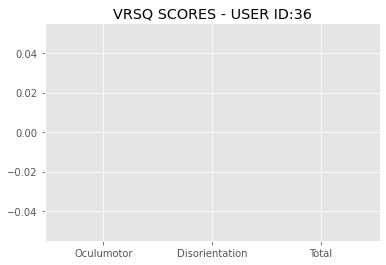

37
0.0 0.0 0.0


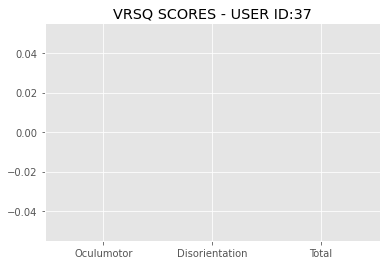

38
8.333333333333329 13.333333333333332 10.83333333333333


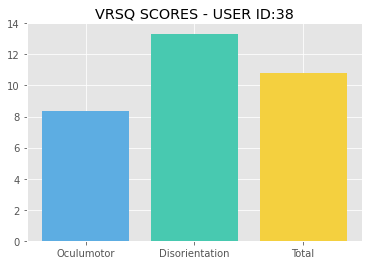

39
8.333333333333336 6.666666666666667 7.500000000000002


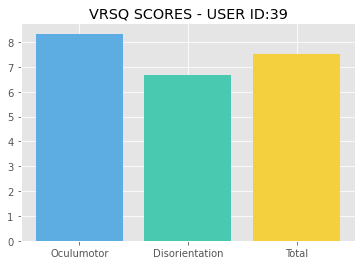

40
41.66666666666667 53.333333333333336 47.5


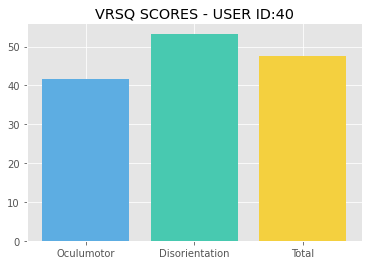

41
-8.333333333333332 20.0 5.833333333333334


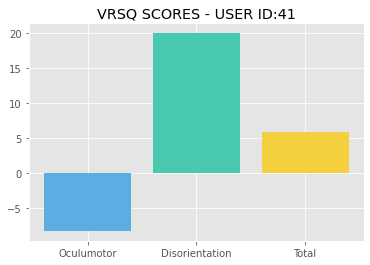

42
8.333333333333332 0.0 4.166666666666666


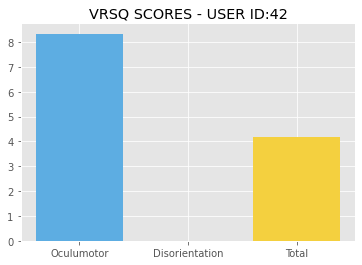

43
0.0 0.0 0.0


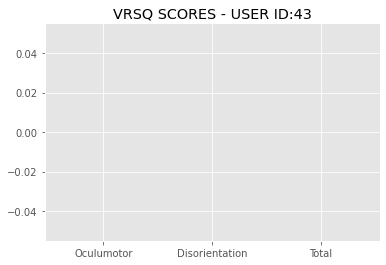

44
0.0 0.0 0.0


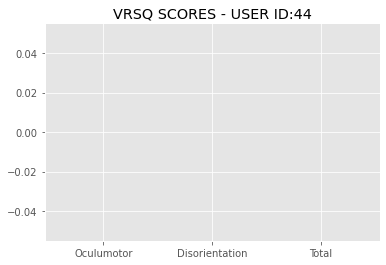

45
-8.333333333333332 0.0 -4.166666666666666


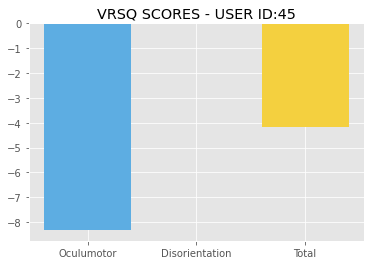

46
0.0 0.0 0.0


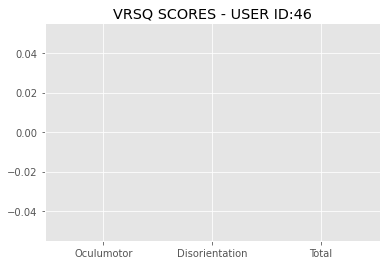

47
-8.333333333333332 0.0 -4.166666666666666


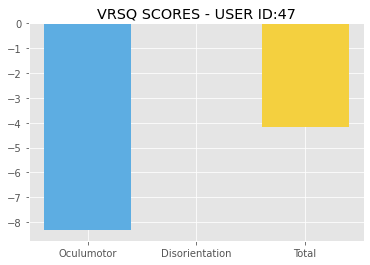

48
24.999999999999996 33.33333333333333 29.166666666666664


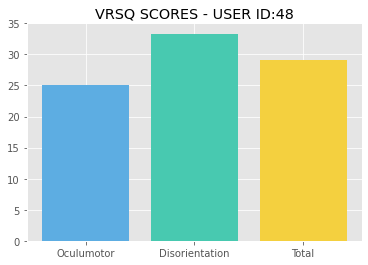

49
0.0 6.666666666666667 3.3333333333333335


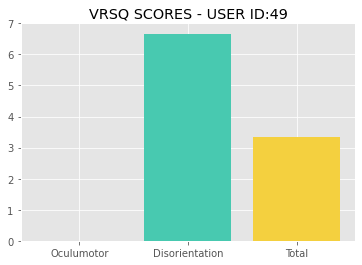

50
-8.333333333333332 6.666666666666667 -0.8333333333333326


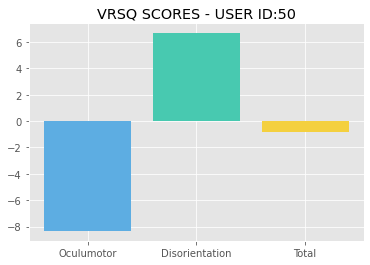

51
0.0 0.0 0.0


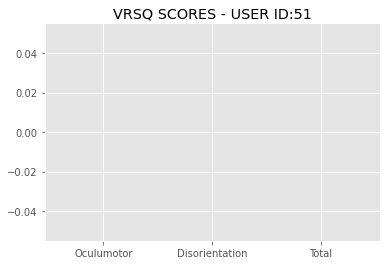

52
0.0 0.0 0.0


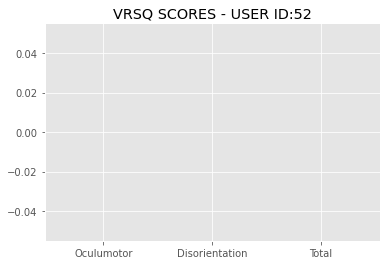

53
0.0 0.0 0.0


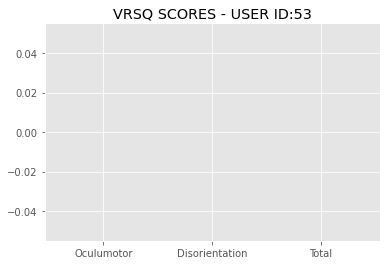

54
16.666666666666668 53.333333333333336 35.0


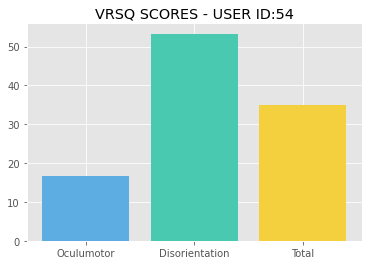

55
-41.66666666666667 0.0 -20.833333333333336


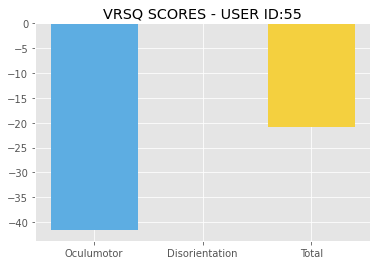

56
8.333333333333332 0.0 4.166666666666666


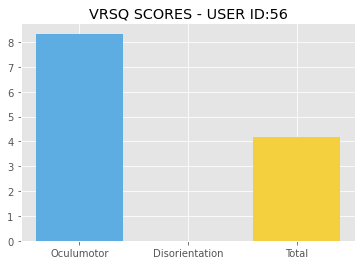

57
0.0 0.0 0.0


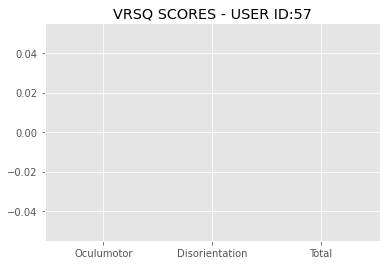

  GeneralDiscomfort Fatigue EyeStraing DifficultyFocusing Headache  \
0                 0       1          1                  1        0   
1                 1       0          2                  0        1   

  FulnessOfHead BlurredVision DizzyEyesClosed Vertigo  
0             0             0               0       0  
1             1             0               0       0  
  GeneralDiscomfort Fatigue EyeStraing DifficultyFocusing Headache  \
0                 0       1          1                  1        0   
1                 1       0          2                  0        1   

  FulnessOfHead BlurredVision DizzyEyesClosed Vertigo  
0             0             0               0       0  
1             1             0               0       0  
  GeneralDiscomfort Fatigue EyeStraing DifficultyFocusing Headache  \
0                 0       0          1                  0        0   
1                 0       0          0                  0        0   

  FulnessOfHead BlurredVision D

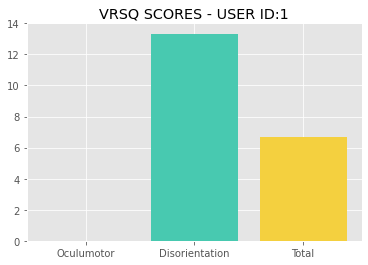

2
-8.333333333333332 0.0 -4.166666666666666


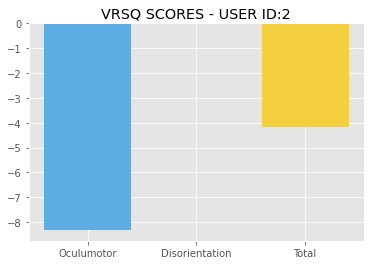

3
0.0 0.0 0.0


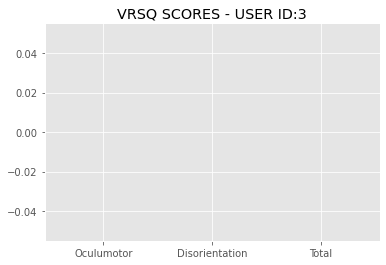

4
-8.333333333333332 0.0 -4.166666666666666


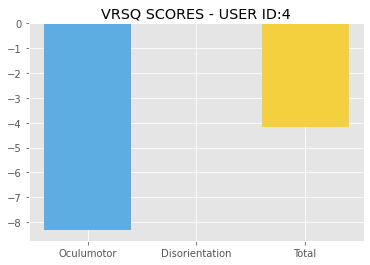

5
8.333333333333332 0.0 4.166666666666666


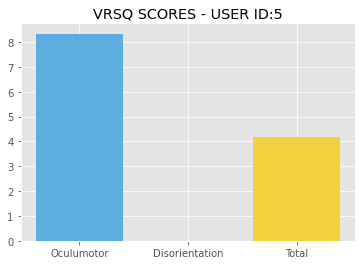

6
16.66666666666667 26.666666666666668 21.66666666666667


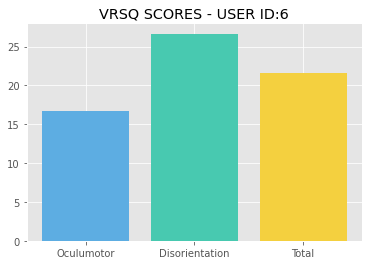

7
33.333333333333336 26.66666666666666 30.0


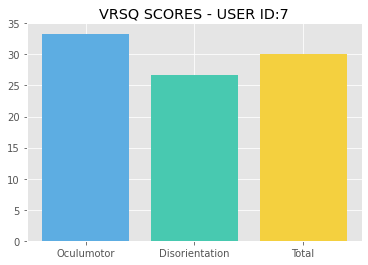

8
-25.0 -6.666666666666667 -15.833333333333334


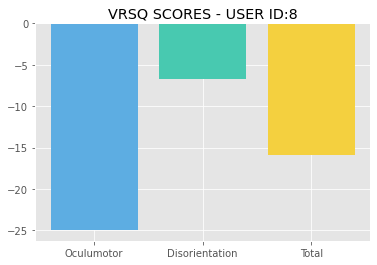

9
0.0 0.0 0.0


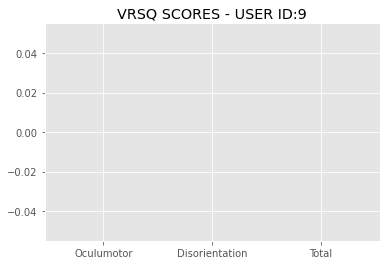

10
8.333333333333343 26.666666666666664 17.500000000000004


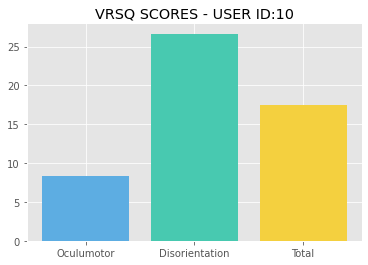

11
0.0 0.0 0.0


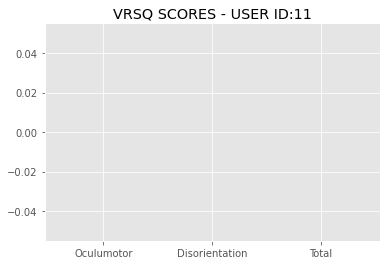

12
-16.666666666666664 6.666666666666667 -4.999999999999998


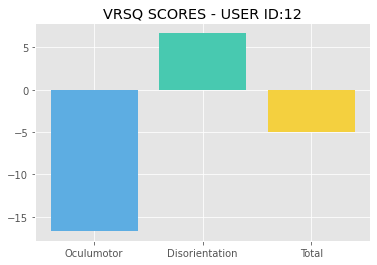

13
8.333333333333332 6.666666666666667 7.5


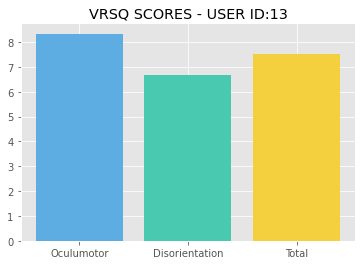

14
-16.66666666666667 0.0 -8.333333333333336


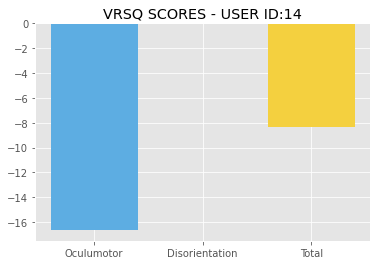

15
-16.666666666666664 0.0 -8.333333333333332


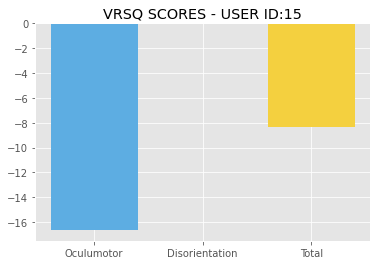

16
0.0 0.0 0.0


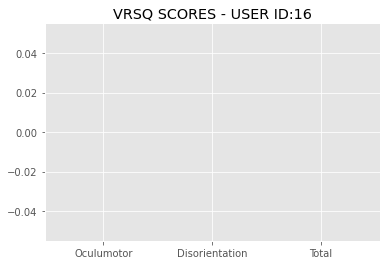

17
-16.666666666666668 0.0 -8.333333333333334


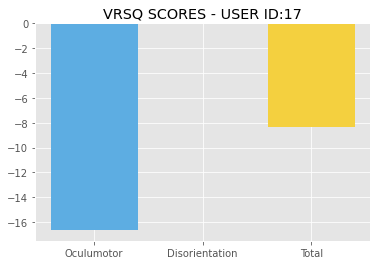

18
0.0 0.0 0.0


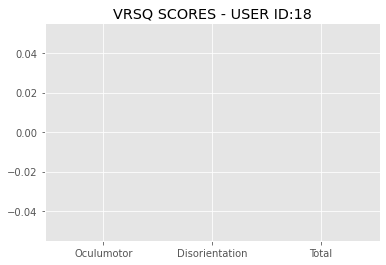

19
0.0 0.0 0.0


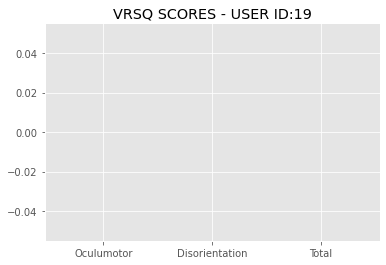

20
0.0 0.0 0.0


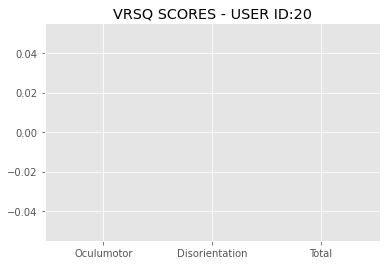

21
-16.666666666666664 0.0 -8.333333333333332


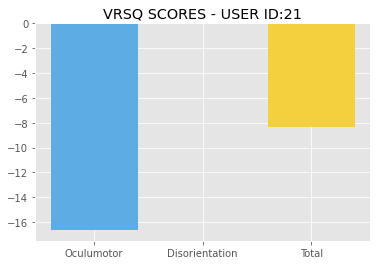

22
0.0 0.0 0.0


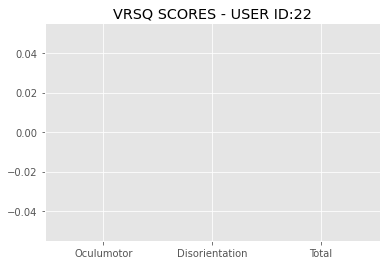

23
0.0 0.0 0.0


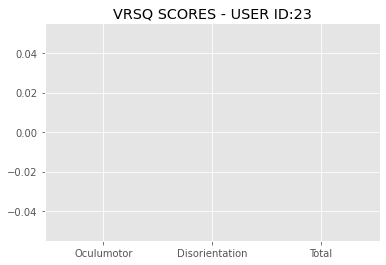

24
25.0 6.666666666666667 15.833333333333334


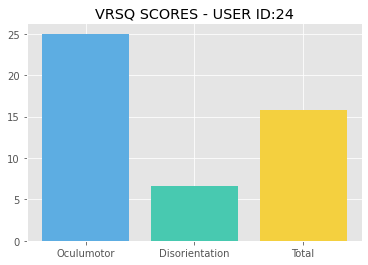

25
0.0 13.333333333333334 6.666666666666667


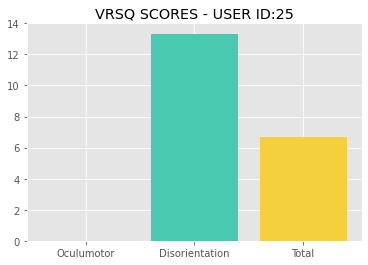

26
-16.666666666666664 6.666666666666667 -4.999999999999998


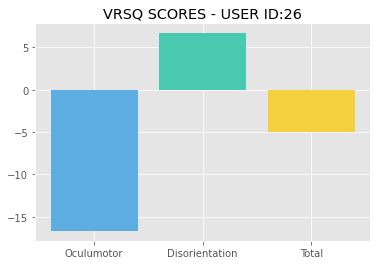

27
0.0 0.0 0.0


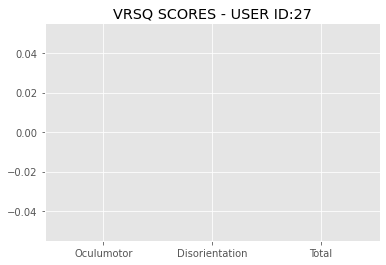

28
0.0 0.0 0.0


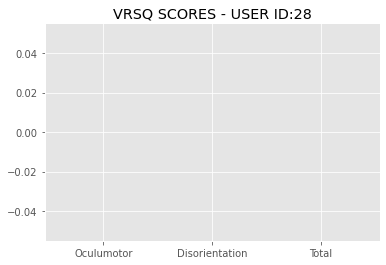

29
16.666666666666668 20.0 18.333333333333336


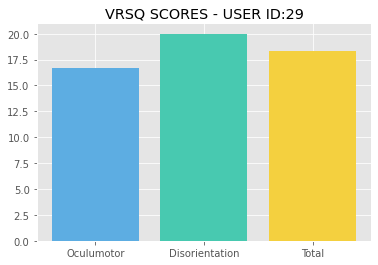

30
0.0 0.0 0.0


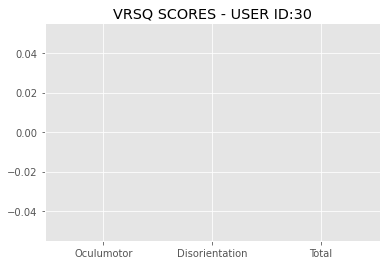

31
0.0 13.333333333333334 6.666666666666667


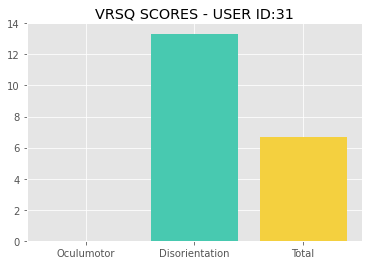

32
-8.333333333333336 0.0 -4.166666666666668


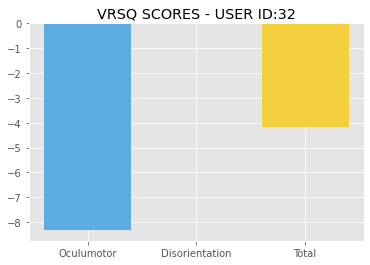

33
16.666666666666664 0.0 8.333333333333332


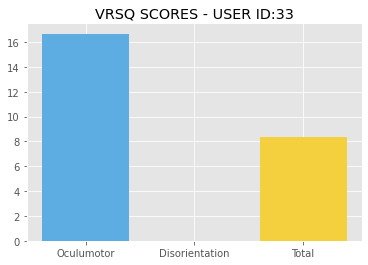

34
8.333333333333336 6.666666666666667 7.500000000000002


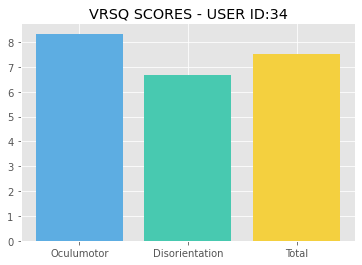

35
0.0 6.666666666666667 3.3333333333333335


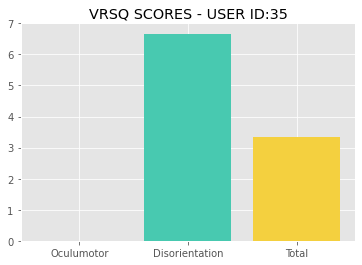

In [ ]:
database = DATABASE_VRSQ_CARRO
# users = ['21','22','23','24','25','26','27','28', '29','30','31','32','33','34','35']
# plotVRSQScores(database, users, 'A')
plotVRSQScores(database, USERS_CARRO, 'A')
   
database = DATABASE_VRSQ_PASSARO
# users = ['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20']
# plotVRSQScores(database, users, 'B')
plotVRSQScores(database, USERS_PASSARO, 'B')

#plotVRSQScores(database, ['21'], 'B')


In [ ]:
A[0]   #Scenario A
# A[1] #Scenario B

oculumotor  disorientation      total
0     0.000000        0.000000   0.000000
1     0.000000        0.000000   0.000000
2     8.333333       13.333333  10.833333
3     8.333333        6.666667   7.500000
4    41.666667       53.333333  47.500000
5    -8.333333       20.000000   5.833333
6     8.333333        0.000000   4.166667
7     0.000000        0.000000   0.000000
8     0.000000        0.000000   0.000000
9    -8.333333        0.000000  -4.166667
10    0.000000        0.000000   0.000000
11   -8.333333        0.000000  -4.166667
12   25.000000       33.333333  29.166667
13    0.000000        6.666667   3.333333
14   -8.333333        6.666667  -0.833333
15    0.000000        0.000000   0.000000
16    0.000000        0.000000   0.000000
17    0.000000        0.000000   0.000000
18   16.666667       53.333333  35.000000
19  -41.666667        0.000000 -20.833333
20    8.333333        0.000000   4.166667
21    0.000000        0.000000   0.000000

## 2 - Execucao de LeaveOneOut Adaptado - RandomForest

In [ ]:
def show_AllRFResultsToDF(users,aucScores,d):
    depth_list = []
    auc_train =[]
    auc_test = []
    for auc in aucScores:
        auc_train.append(auc[0])
        auc_test.append(auc[1])
    for i in range(len(users)):
        depth_list.append(d)
        
    print(auc_train)
    
    df1 = pd.DataFrame(users, columns=['User ID'])
    df2 = pd.DataFrame(depth_list, columns=['Depth'])
    df3 = pd.DataFrame(auc_train, columns=['Auc Train'])
    df4 = pd.DataFrame(auc_test, columns=['Auc Test'])
    dfresult =  pd.concat([df1,df2,df3,df4], axis=1, join='inner')
    return dfresult

In [ ]:
print("LeaveOneOut Flight")
database = DATABASE_PASSARO
# users = ['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20']
features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featureOut = []
#models = RFLeaveOneOutUser(database,7, users, featureOut, True, True,True)
print("------------------")


df_col_rf_flight = []

for d in range(7,22):
  # results = RFLeaveOneOutUser(database,7, users, featureOut, True, True,True) # Changes to work on Google Colab
  # results = RFLeaveOneOutUser(database,d, users, featureOut, True, True,True) # Changes to work on Google Colab
  results = RFLeaveOneOutUser(database,d, USERS_PASSARO, featureOut, True, True,True) # Changes to work on Google Colab
  rf_flight_model = results[0]
  aucScores = results[1]
  # df_col_rf_flight.append(show_AllRFResultsToDF(users,aucScores,9)) # Changes to work on Google Colab
  # df_col_rf_flight.append(show_AllRFResultsToDF(users,aucScores,d)) # Changes to work on Google Colab
  df_col_rf_flight.append(show_AllRFResultsToDF(USERS_PASSARO,aucScores,d)) # Changes to work on Google Colab



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df_col_rf_flight[14].style.hide_index()
new_df = df_col_rf_flight[0] # Changes to work on Google Colab
# new_df.iloc[14] # Changes to work on Google Colab
new_df.style.hide_index() #  Changes to work on Google Colab


In [ ]:
#LeaveOneOut tests
print("LeaveOneOut Car")
database = DATABASE_CARRO
# users = ['21','22','23','24','25','26','27','28', '29','30','31','32','33','34','35']
# features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featureOut = []
#models_car = RFLeaveOneOutUser(database, users, featureOut, True, True)
print("------------------")

df_col_rf_car = []

for d in range(7,22):
  # results = RFLeaveOneOutUser(database,7, users, featureOut, True, True,True) # Changes to work on Google Colab
  # results = RFLeaveOneOutUser(database,d, users, featureOut, True, True,True) # Changes to work on Google Colab
  results = RFLeaveOneOutUser(database,d, USERS_CARRO, featureOut, True, True,True) # Changes to work on Google Colab
  aucScores = results[1]
  # df_col_rf_car.append(show_AllRFResultsToDF(users,aucScores)) # Changes to work on Google Colab
  # df_col_rf_car.append(show_AllRFResultsToDF(users,aucScores, 7)) # Changes to work on Google Colab
  # df_col_rf_car.append(show_AllRFResultsToDF(users,aucScores, d)) # Changes to work on Google Colab
  df_col_rf_car.append(show_AllRFResultsToDF(USERS_CARRO,aucScores, d)) # Changes to work on Google Colab

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df_col_rf_car[14].style.hide_index()
new_df = df_col_rf_car[0] # Changes to work on Google Colab
# new_df.iloc[14] # Changes to work on Google Colab
new_df.style.hide_index() # Changes to work on Google Colab

## 3 - Execucao LeaveOneOut Adaptado - Decision Tree

In [ ]:
def show_MinLeafsAndAucScoreResults(users,minLeafsValues,aucScores):
    depth_list = []
    auc_train =[]
    auc_test = []
    minValues = []
    for auc in aucScores:
        auc_train.append(auc[0])
        auc_test.append(auc[1])
    for i in range(len(users)):
        depth_list.append(d)
    for m in minLeafsValues:
        minValues.append(m)
    df1 = pd.DataFrame(users, columns=['User ID'])
    df2 = pd.DataFrame(depth_list, columns=['Depth'])
    df3 = pd.DataFrame(minValues, columns=['MinLeavesValue'])
    df4 = pd.DataFrame(auc_train, columns=['Auc Train'])
    df5 = pd.DataFrame(auc_test, columns=['Auc Test'])
    dfresult =  pd.concat([df1,df2,df3,df4,df5], axis=1, join='inner')
    return dfresult

In [ ]:
#LeaveOneOut tests
print("LeaveOneOut Flight")
database = DATABASE_PASSARO
# users = ['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20']
features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featureOut = []
#dt_models_flight = LeaveOneOutUser(database, users, featureOut,7, True, True,False)

dt_models_flight = []
df_col = []
#d = 10
for d in range(7,22):
    # results = LeaveOneOutUser(database, users, featureOut,d, True, True,False,True)
    results = LeaveOneOutUser(database, USERS_PASSARO, featureOut,d, True, True,False,True)
    minLeafsValues = results[1]
    aucScores = results[2]
    dt_models_flight.append(results[0])
    # df_col.append(show_MinLeafsAndAucScoreResults(users,minLeafsValues,aucScores))
    df_col.append(show_MinLeafsAndAucScoreResults(USERS_PASSARO,minLeafsValues,aucScores))
    

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_col[14].style.hide_index()

In [ ]:
print("LeaveOneOut CAR")
#LeaveOneOut tests
database = DATABASE_CARRO
# users = ['21','22','23','24','25','26','27','28', '29','30','31','32','33','34','35']
features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featureOut = []
dt_models_car = []

df_col_car = []
for d in range(7,22):
    # results = LeaveOneOutUser(database, users, featureOut,d, True, True,False,True)
    results = LeaveOneOutUser(database, USERS_CARRO, featureOut,d, True, True,False,True)
    minLeafsValues = results[1]
    aucScores = results[2]
    dt_models_car.append(results[0])
    # df_col_car.append(show_MinLeafsAndAucScoreResults(users,minLeafsValues,aucScores))
    df_col_car.append(show_MinLeafsAndAucScoreResults(USERS_CARRO,minLeafsValues,aucScores))
print("------------------")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_col_car[14].style.hide_index()

In [ ]:
#Este teste, me mostra o desconforto predito em cada instancia e a lista de causas associadas naquela instancia
#Gero um dataframe final com a timeline da experiencia de jogo
#Retiro do conjunto de teste o usuario que ira fazer parte do Teste
#dtModel 
def PredictDiscomfortAndCausesFromUserOutTrainingRF(_database, user, _depth, featuresOut):
    # Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
    # Set it None to display all rows in the dataframe
    pd.set_option('display.max_rows', None)

    result = parseXmlDirToDataFrame(_database,[user])
    df = result[0]
    in_training = result[1]
    out_training = result[2]
    df_out = result[3]
    raw_df_out = df_out
    depth = _depth
    #Pre process dataset
    df = PreProcessDataFrame(df,featuresOut) #['TimeStamp']
    df = oversampling(df)
    attributes = df.columns[:-1]
    df_out = PreProcessDataFrame(df_out,featuresOut)

    results = RFTrainingProcessWithReport(_database,featuresOut,[user],depth,True)
   # c_report = GetCustomReportAccF1Auc(results)

    dtModel = results[0]

    #prediction
    r = predict_discomfort_rf(df_out,results[0],attributes.values,False)
    #causes = r[0]
    raw_pred = r[2]
    raw_causes = r[3]
    causes_node_depth = r[1]
    dfpred = pd.DataFrame(raw_pred, columns=['prediction ' + user ])
    dfreal = pd.DataFrame(raw_df_out['DiscomfortLevel'].values.tolist(), columns=['real ' + user])
    dftime = pd.DataFrame(raw_df_out['TimeStamp'].values.tolist(), columns=['TimeStamp'])
   # dfcauses = pd.DataFrame(raw_causes,columns=['causes'])
    #dfNodeDepths = pd.DataFrame(raw_nodes_depth,columns=['Feature','NodeDepth'])
    
    causes_array = []
    node_depth_array = []
    for item in causes_node_depth:
        causes_array.append(item[0])
        node_depth_array.append(item[1])
        #print (str(item[0]) + ' ' + str(item[1]))
    
    #vou precisar agora calcular novamente a frequencia das causas com os pesos e  normalizar
    fn = []       
    #print(len(causes))
    #print(len(causes_array))
    
    if (len(causes_array) > 0):
        plot_causes_graph(calculate_causes_feqweighted(causes_array,node_depth_array),user, True)   
        #ranking = calculate_causes_feqweighted(causes_array,node_depth_array)
    dfresult =  pd.concat([dftime,dfpred, dfreal], axis=1, join='inner')
    return dfresult

### 3.1 Testes com o melhor modelo gerado pelo LOO por Decision Tree e plotagem das causas

Predicao de causas com plot jogo do passaro de todos os usuarios

In [ ]:
#Este teste, me mostra o desconforto predito em cada instancia e a lista de causas associadas naquela instancia
#Gero um dataframe final com a timeline da experiencia de jogo
#Retiro do conjunto de teste o usuario que ira fazer parte do Teste
#dtModel 
def PredictDiscomfortAndCausesFromUserOutTraining(_database, user, _depth, featuresOut):
    # Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
    # Set it None to display all rows in the dataframe
    pd.set_option('display.max_rows', None)

    result = parseXmlDirToDataFrame(_database,[user])
    df = result[0]
    in_training = result[1]
    out_training = result[2]
    df_out = result[3]
    raw_df_out = df_out
    depth = _depth
    #Pre process dataset
    df = PreProcessDataFrame(df,featuresOut) #['TimeStamp']
    df = oversampling(df)
    attributes = df.columns[:-1]
    df_out = PreProcessDataFrame(df_out,featuresOut)

    results = TrainingProcessWithReport(_database,featuresOut,[user],depth,True,False)
    c_report = GetCustomReportAccF1Auc(results)

    dtModel = results[0]

    #prediction
    r = predict_discomfort(df_out,results[0],attributes.values,False)
    causes = r[0]
    raw_pred = r[4]
    raw_causes = r[5]
    causes_node_depth = r[6]
    dfpred = pd.DataFrame(raw_pred, columns=['prediction ' + user ])
    dfreal = pd.DataFrame(raw_df_out['DiscomfortLevel'].values.tolist(), columns=['real ' + user])
    dftime = pd.DataFrame(raw_df_out['TimeStamp'].values.tolist(), columns=['TimeStamp'])
    #dfcauses = pd.DataFrame(raw_causes,columns=['causes'])
    #dfNodeDepths = pd.DataFrame(raw_nodes_depth,columns=['Feature','NodeDepth'])
    
    causes_array = []
    node_depth_array = []
    for item in causes_node_depth:
        causes_array.append(item[0])
        node_depth_array.append(item[1])
        #print (str(item[0]) + ' ' + str(item[1]))
    
    #vou precisar agora calcular novamente a frequencia das causas com os pesos e  normalizar
    fn = []       
    #print(len(causes))
    #print(len(causes_array))
    
    if (len(causes_array) > 0):
        plot_causes_graph(calculate_causes_feqweighted(causes_array,node_depth_array),user, True)   
        #ranking = calculate_causes_feqweighted(causes_array,node_depth_array)
    dfresult =  pd.concat([dfpred, dfreal], axis=1, join='inner')
    return dfresult


36
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 7684 , X_test =  302 , y_train = 7684 , y_test = 302 , y_pred = 302
Depth: 13
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '49', '40', '47', '44', '56', '38', '52', '37', '57', '43', '46', '45']


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       302
           1       0.00      0.00      0.00         0

    accuracy                           0.62       302
   macro avg       0.50      0.31      0.38       302
weighted avg       1.00      0.62      0.77       302

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience', 'UserGenere']
[22.62, 0.4, 6.5, 13.86, 33.1, 14.35, 9.18]
37
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 8040 , X_test =  303 , y_train = 8040 , y_test = 303 , y_pred = 303
Depth: 13
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '49', '40', '36', '47', '44', '56', '38', '52', '57', '43', '46', '45']
              precision    recall 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       303
           1       0.00      0.00      0.00         0

    accuracy                           0.48       303
   macro avg       0.50      0.24      0.32       303
weighted avg       1.00      0.48      0.65       303

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience', 'UserGenere']
[17.63, 2.25, 3.14, 15.55, 36.48, 14.16, 10.79]
39
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 7746 , X_test =  303 , y_train = 7746 , y_test = 303 , y_pred = 303
Depth: 13
Minimum Leaf Sample:3
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '50', '54', '49', '40', '36', '47', '44', '56', '38', '52', '37', '57', '43', '46', '45']
              precision    rec

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.26      0.42       302
           1       0.00      0.00      0.00         0

    accuracy                           0.26       302
   macro avg       0.50      0.13      0.21       302
weighted avg       1.00      0.26      0.42       302

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience']
[16.29, 12.81, 0.01, 16.97, 34.75, 19.16]
43
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 7684 , X_test =  302 , y_train = 7684 , y_test = 302 , y_pred = 302
Depth: 13
Minimum Leaf Sample:3
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '49', '40', '36', '47', '44', '56', '38', '52', '37', '57', '46', '45']


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       302
           1       0.00      0.00      0.00         0

    accuracy                           0.56       302
   macro avg       0.50      0.28      0.36       302
weighted avg       1.00      0.56      0.72       302

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience', 'UserGenere']
[18.53, 1.37, 10.58, 11.21, 42.05, 7.23, 9.03]
44
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 7964 , X_test =  302 , y_train = 7964 , y_test = 302 , y_pred = 302
Depth: 13
Minimum Leaf Sample:5
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '49', '40', '36', '47', '56', '38', '52', '37', '57', '43', '46', '45']
              precision    reca

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       302
           1       0.00      0.00      0.00         0

    accuracy                           0.63       302
   macro avg       0.50      0.31      0.38       302
weighted avg       1.00      0.63      0.77       302

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience', 'UserGenere']
[15.98, 0.78, 11.23, 12.05, 40.68, 10.34, 8.94]
47
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 8212 , X_test =  303 , y_train = 8212 , y_test = 303 , y_pred = 303
Depth: 13
Minimum Leaf Sample:3
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '49', '40', '36', '44', '56', '38', '52', '37', '57', '43', '46', '45']
              precision    rec

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.38      0.55       302
           1       0.00      0.00      0.00         0

    accuracy                           0.38       302
   macro avg       0.50      0.19      0.28       302
weighted avg       1.00      0.38      0.55       302

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience', 'UserGenere']
[22.8, 0.1, 7.82, 12.63, 35.74, 14.77, 6.13]
49
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 7682 , X_test =  303 , y_train = 7682 , y_test = 303 , y_pred = 303
Depth: 13
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '40', '36', '47', '44', '56', '38', '52', '37', '57', '43', '46', '45']


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.51      0.67       303
           1       0.00      0.00      0.00         0

    accuracy                           0.51       303
   macro avg       0.50      0.25      0.34       303
weighted avg       1.00      0.51      0.67       303

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience', 'UserGenere']
[12.29, 0.82, 7.53, 11.89, 43.65, 13.74, 10.08]
50
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 8218 , X_test =  302 , y_train = 8218 , y_test = 302 , y_pred = 302
Depth: 13
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '54', '49', '40', '36', '47', '44', '56', '38', '52', '37', '57', '43', '46', '45']
              precision    rec

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


57
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 7982 , X_test =  302 , y_train = 7982 , y_test = 302 , y_pred = 302
Depth: 13
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '49', '40', '36', '47', '44', '56', '38', '52', '37', '43', '46', '45']
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       153
           1       0.66      0.54      0.60       149

    accuracy                           0.64       302
   macro avg       0.64      0.63      0.63       302
weighted avg       0.64      0.64      0.63       302

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserExperience']
[27.29, 0.42, 10.83, 13.22, 36.58, 11.65]


<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


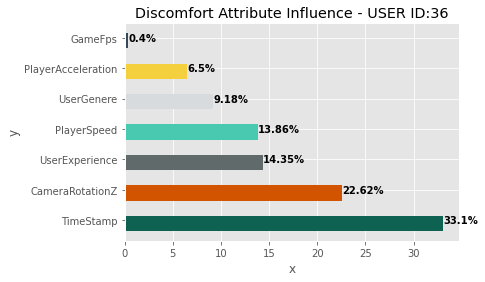

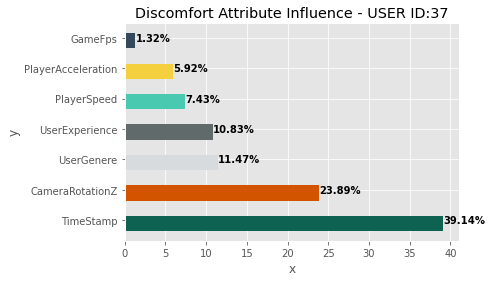

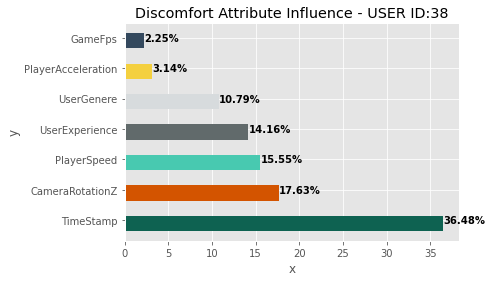

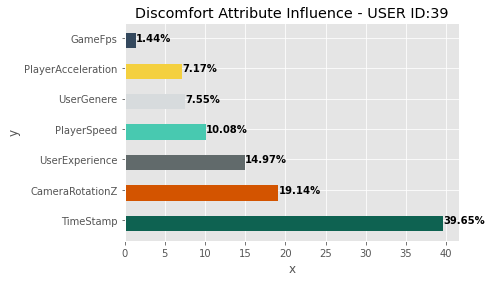

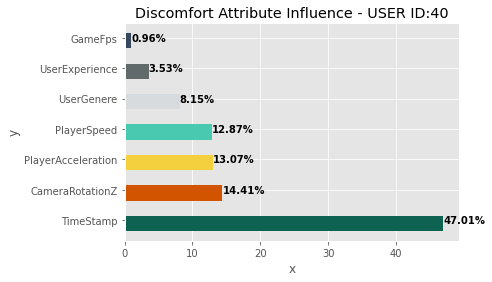

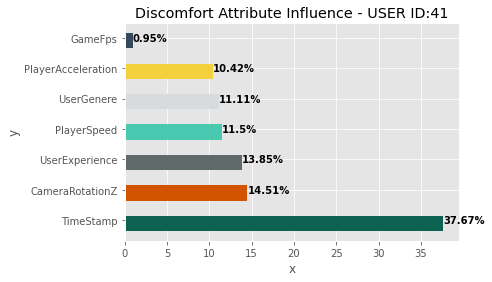

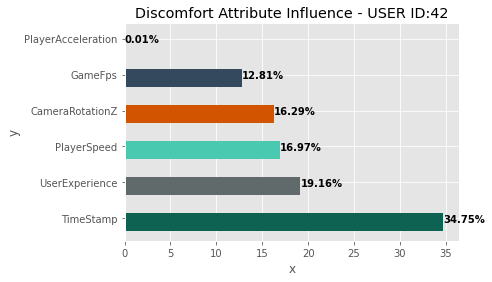

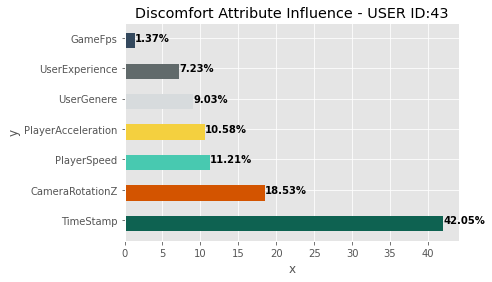

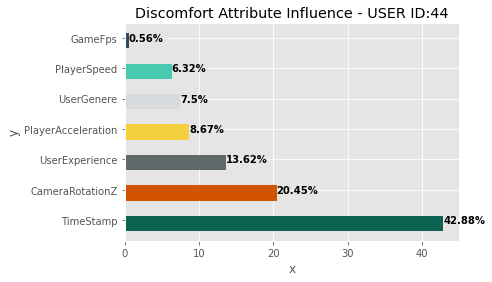

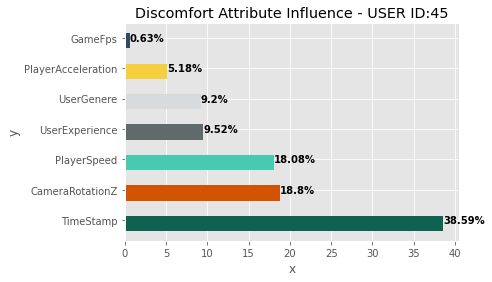

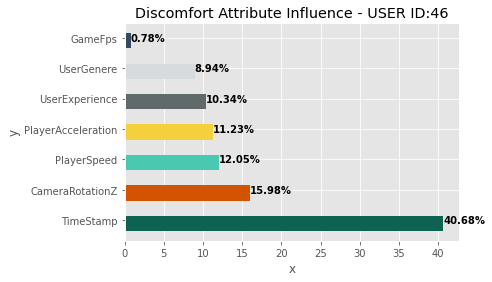

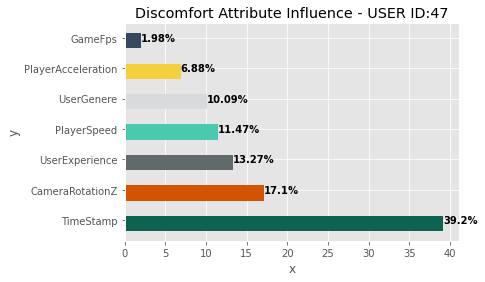

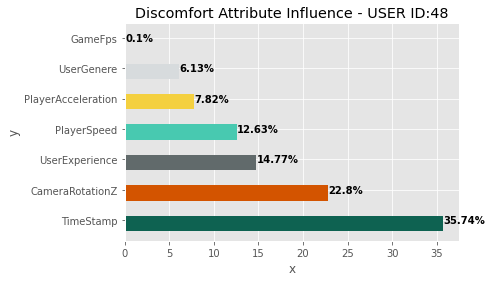

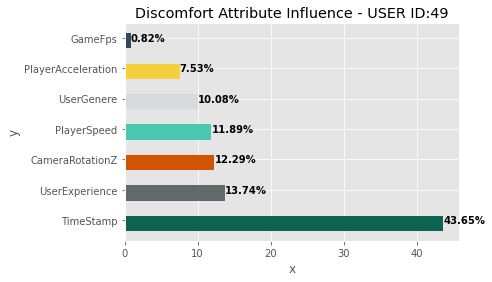

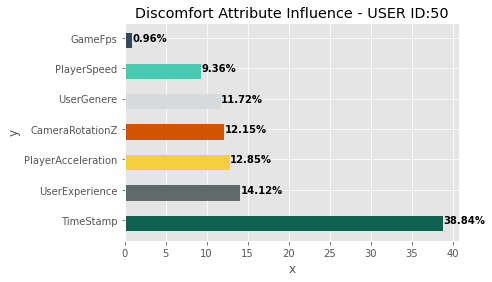

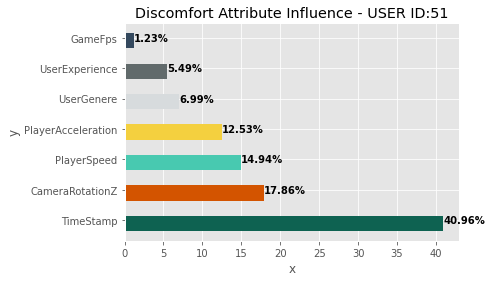

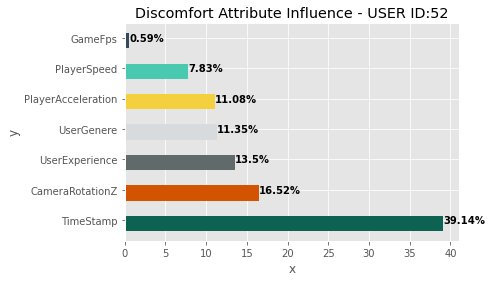

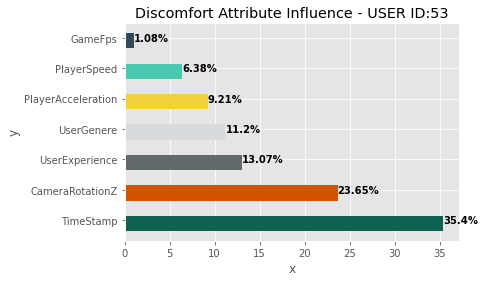

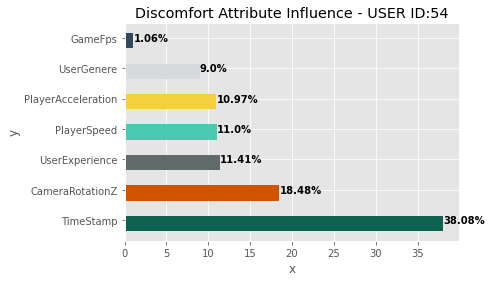

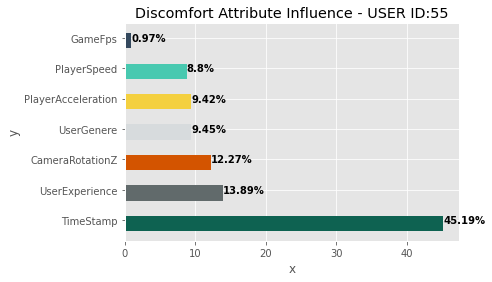

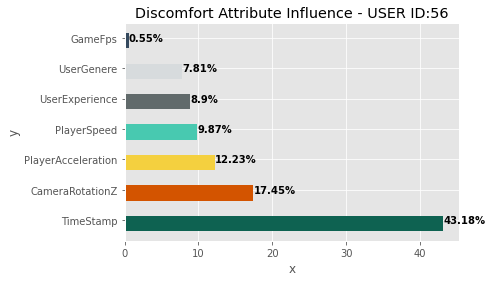

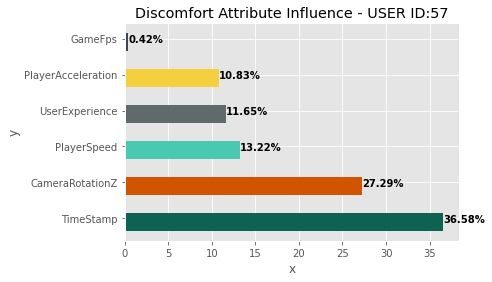

In [ ]:
#Decision Teste sem usar LeaveOneOut
databaseA = DATABASE_CARRO


# PREDICAO JOGO DO CARRO - PREDICAO DE DESCONFORTO PARA USUARIOS
# TestUsersA =  ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']
A = []
#features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featuresOut = []
# for userA in TestUsersA:
for userA in USERS_CARRO:
    print(userA)
    r = PredictDiscomfortAndCausesFromUserOutTraining(databaseA, userA, 13, featuresOut) #USANDO A MELHOR PROFUNDIDADE DADA PELO MIN LEAF
    A.append(r)

01
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  49
X_train = 12428 , X_test =  49 , y_train = 12428 , y_test = 49 , y_pred = 49
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.81      0.51      0.63        43
           1       0.05      0.17      0.07         6

    accuracy                           0.47        49
   macro avg       0.43      0.34      0.35        49
weighted avg       0.72      0.47      0.56        49

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserExperience', 'UserGenere']
[33.27, 6.63, 0.61, 39.9,

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[33.73, 0.95, 0.01, 2.88, 26.68, 12.4, 12.81, 10.54]
03
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12474 , X_test =  302 , y_train = 12474 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.16      1.00      0.27        20
           1       1.00      0.62      0.77       282

    accuracy                           0.65       302
   macro avg       0.58      0.81      0.52 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[34.31, 0.03, 0.05, 15.24, 26.68, 12.91, 3.26, 7.52]
05
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 11908 , X_test =  303 , y_train = 11908 , y_test = 303 , y_pred = 303
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27']
              precision    recall  f1-score   support

           0       1.00      0.71      0.83       303
           1       0.00      0.00      0.00         0

    accuracy                           0.71       303
   macro avg       0.50      0.35      0.42 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[39.44, 2.53, 0.08, 6.06, 24.03, 17.38, 9.3, 1.19]
06
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 12260 , X_test =  303 , y_train = 12260 , y_test = 303 , y_pred = 303
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       127
           1       0.70      0.78      0.73       176

    accuracy                           0.67       303
   macro avg       0.66      0.65      0.65   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[32.57, 2.43, 0.57, 27.55, 15.65, 17.72, 3.52]
09
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12116 , X_test =  302 , y_train = 12116 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:5
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.93      0.46      0.61       199
           1       0.47      0.93      0.63       103

    accuracy                           0.62       302
   macro avg       0.70      0.69      0.62       302
weighted avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

11
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12340 , X_test =  302 , y_train = 12340 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.39      0.89      0.54        87
           1       0.90      0.43      0.58       215

    accuracy                           0.56       302
   macro avg       0.64      0.66      0.56       302
weighted avg       0.75      0.56      0.57       302

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[44.36, 0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       302
           1       0.00      0.00      0.00         0

    accuracy                           0.77       302
   macro avg       0.50      0.39      0.44       302
weighted avg       1.00      0.77      0.87       302



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerAcceleration', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[47.67, 0.0, 0.03, 4.93, 22.83, 15.56, 3.99, 4.99]
14
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:5
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       302
           1       0.00      0.00      0.00         0

    accuracy                           0.28       302
   macro avg       0.50      0.14      0.22   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[35.68, 0.01, 0.05, 24.4, 15.48, 13.31, 11.06]
15
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  228
X_train = 12478 , X_test =  228 , y_train = 12478 , y_test = 228 , y_pred = 228
Depth: 9
Minimum Leaf Sample:5
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.13      1.00      0.22        18
           1       1.00      0.40      0.58       210

    accuracy                           0.45       228
   macro avg       0.56      0.70      0.40       228
weighted avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[28.72, 0.03, 0.47, 27.84, 17.67, 21.59, 3.68]
17
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:5
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       0.00      0.00      0.00         0

    accuracy                           1.00       302
   macro avg       0.50      0.50      0.50       302
weighted avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

18
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  225
X_train = 12398 , X_test =  225 , y_train = 12398 , y_test = 225 , y_pred = 225
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.29      0.67      0.40        58
           1       0.79      0.42      0.55       167

    accuracy                           0.48       225
   macro avg       0.54      0.55      0.47       225
weighted avg       0.66      0.48      0.51       225

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[32.93, 0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[33.12, 0.09, 0.42, 30.69, 14.93, 15.11, 5.64]
22
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       302
           1       0.00      0.00      0.00         0

    accuracy                           0.98       302
   macro avg       0.50      0.49      0.49       302
weighted avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

23
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 11908 , X_test =  303 , y_train = 11908 , y_test = 303 , y_pred = 303
Depth: 9
Minimum Leaf Sample:6
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.38      0.55       303
           1       0.00      0.00      0.00         0

    accuracy                           0.38       303
   macro avg       0.50      0.19      0.27       303
weighted avg       1.00      0.38      0.55       303



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserGenere']
[36.75, 0.32, 15.87, 29.15, 17.4, 0.51]


<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


24
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12394 , X_test =  302 , y_train = 12394 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.50      1.00      0.66        60
           1       1.00      0.75      0.86       242

    accuracy                           0.80       302
   macro avg       0.75      0.87      0.76       302
weighted avg       0.90      0.80      0.82       302

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[36.96, 0.

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


25
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 12228 , X_test =  303 , y_train = 12228 , y_test = 303 , y_pred = 303
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.40      0.43      0.42       143
           1       0.46      0.42      0.44       160

    accuracy                           0.43       303
   macro avg       0.43      0.43      0.43       303
weighted avg       0.43      0.43      0.43       303

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[36.2, 0.1

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


26
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 11908 , X_test =  303 , y_train = 11908 , y_test = 303 , y_pred = 303
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.27      0.42       303
           1       0.00      0.00      0.00         0

    accuracy                           0.27       303
   macro avg       0.50      0.13      0.21       303
weighted avg       1.00      0.27      0.42       303



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[33.34, 0.0, 0.01, 28.87, 15.56, 13.33, 8.89]


<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


27
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11922 , X_test =  302 , y_train = 11922 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '05']
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       296
           1       0.00      0.00      0.00         6

    accuracy                           0.96       302
   macro avg       0.49      0.49      0.49       302
weighted avg       0.96      0.96      0.96       302

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[29.33, 0.

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


28
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:5
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.32      0.49       302
           1       0.00      0.00      0.00         0

    accuracy                           0.32       302
   macro avg       0.50      0.16      0.24       302
weighted avg       1.00      0.32      0.49       302



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[30.29, 1.15, 1.25, 36.29, 13.94, 5.98, 11.09]


<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


29
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 12348 , X_test =  303 , y_train = 12348 , y_test = 303 , y_pred = 303
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        83
           1       0.96      0.99      0.97       220

    accuracy                           0.96       303
   macro avg       0.96      0.93      0.94       303
weighted avg       0.96      0.96      0.96       303

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[43.37, 0.

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


30
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       302
           1       0.00      0.00      0.00         0

    accuracy                           0.73       302
   macro avg       0.50      0.36      0.42       302
weighted avg       1.00      0.73      0.84       302



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[37.68, 0.35, 0.54, 23.02, 16.94, 17.61, 3.86]


<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


31
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       1.00      0.66      0.79       302
           1       0.00      0.00      0.00         0

    accuracy                           0.66       302
   macro avg       0.50      0.33      0.40       302
weighted avg       1.00      0.66      0.79       302



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

['CameraRotationZ', 'GameFps', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[28.89, 0.0, 26.67, 17.78, 17.78, 8.89]


<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


32
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12464 , X_test =  302 , y_train = 12464 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:3
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        25
           1       1.00      0.01      0.01       277

    accuracy                           0.09       302
   macro avg       0.54      0.50      0.08       302
weighted avg       0.92      0.09      0.03       302

['CameraRotationZ', 'GameFps', 'TimeStamp', 'UserAge', 'UserExperience']
[45.45, 4.55, 20.45, 15.91, 13.64]


<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


33
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  295
X_train = 12486 , X_test =  295 , y_train = 12486 , y_test = 295 , y_pred = 295
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        14
           1       1.00      0.54      0.70       281

    accuracy                           0.56       295
   macro avg       0.55      0.77      0.44       295
weighted avg       0.96      0.56      0.67       295

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[28.51, 0.

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


34
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12380 , X_test =  302 , y_train = 12380 , y_test = 302 , y_pred = 302
Depth: 9
Minimum Leaf Sample:5
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.36      0.57      0.44        67
           1       0.85      0.71      0.78       235

    accuracy                           0.68       302
   macro avg       0.61      0.64      0.61       302
weighted avg       0.74      0.68      0.70       302

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[31.24, 0.

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


35
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  301
X_train = 12206 , X_test =  301 , y_train = 12206 , y_test = 301 , y_pred = 301
Depth: 9
Minimum Leaf Sample:4
in training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
in training(users):  ['12', '13', '18', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
              precision    recall  f1-score   support

           0       0.62      0.41      0.49       154
           1       0.54      0.73      0.62       147

    accuracy                           0.57       301
   macro avg       0.58      0.57      0.56       301
weighted avg       0.58      0.57      0.56       301

['CameraRotationZ', 'GameFps', 'PlayerSpeed', 'TimeStamp', 'UserAge', 'UserExperience', 'UserGenere']
[34.95, 0.

<ipython-input-12-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


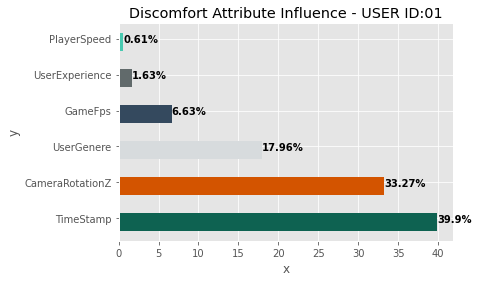

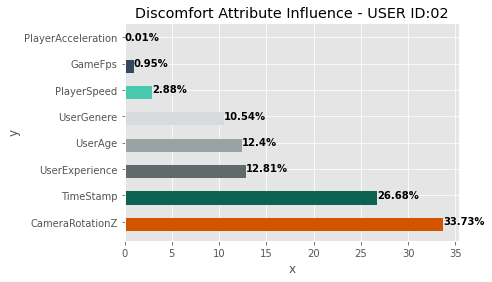

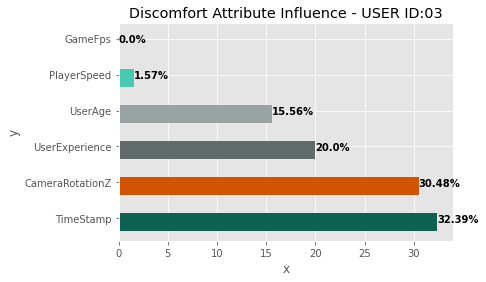

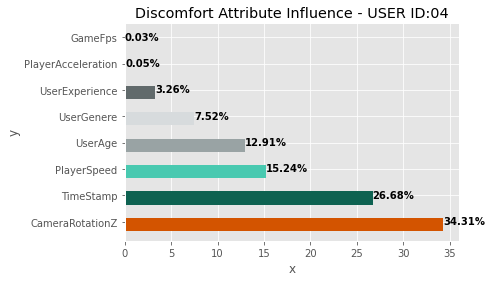

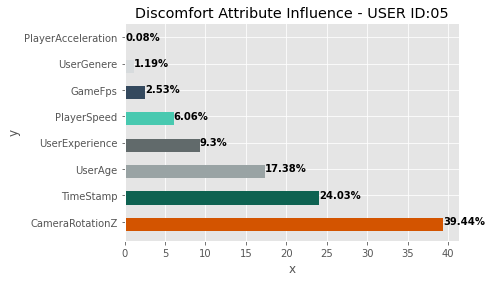

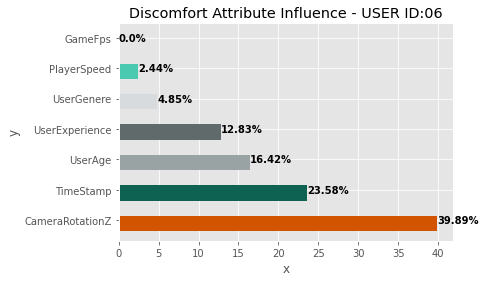

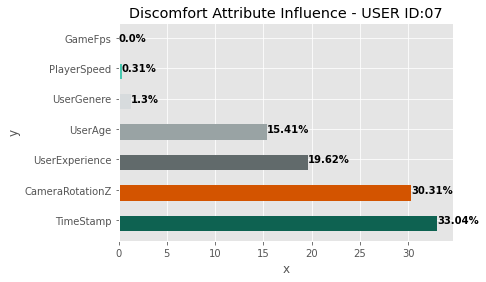

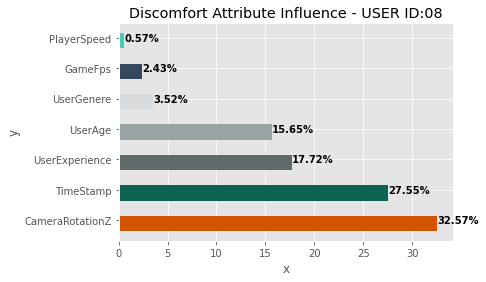

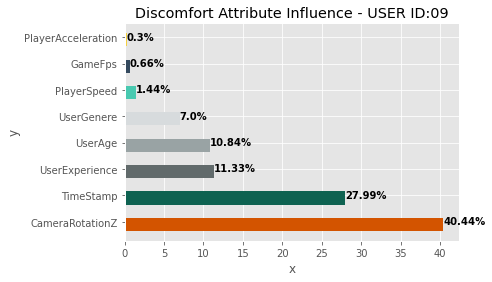

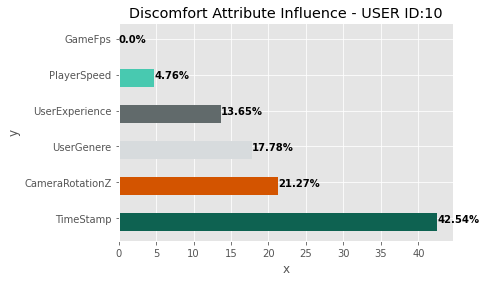

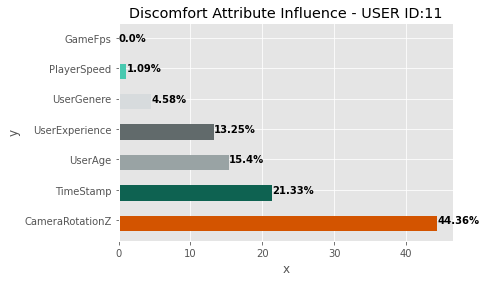

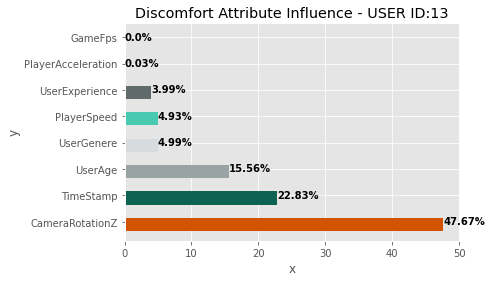

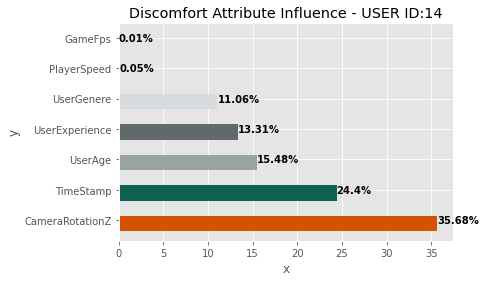

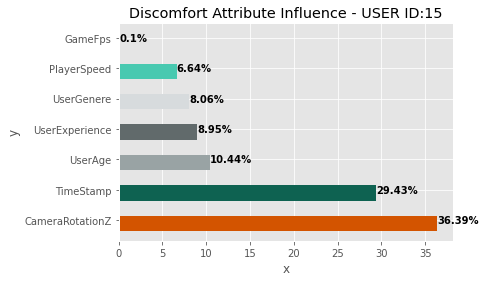

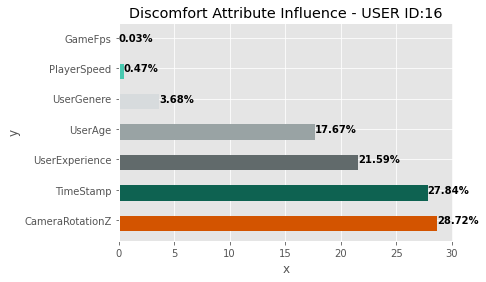

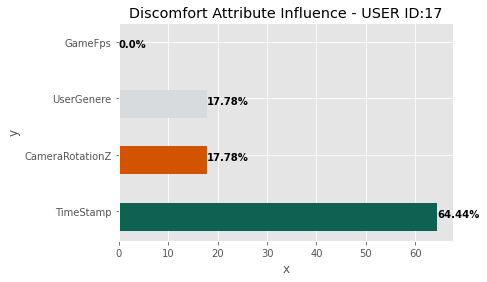

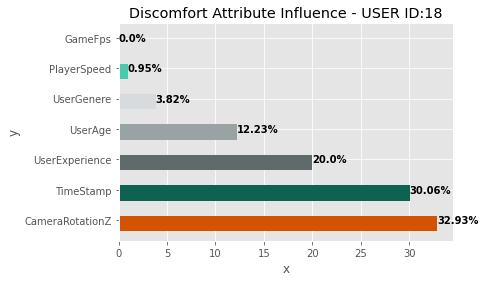

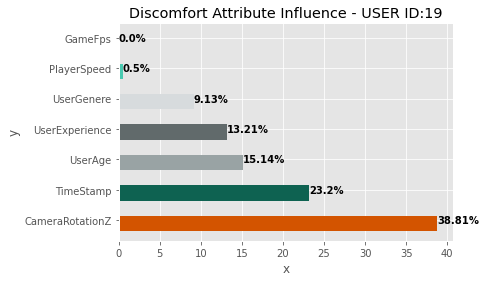

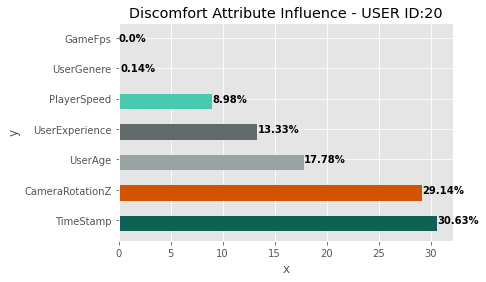

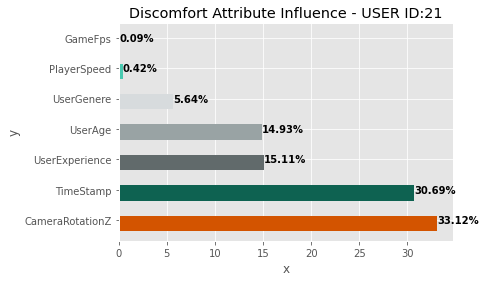

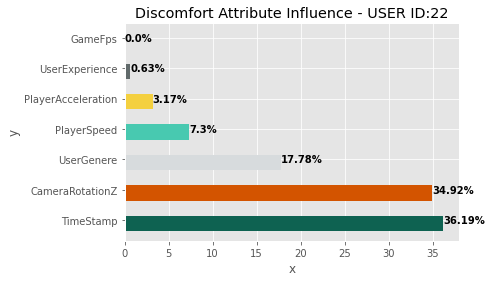

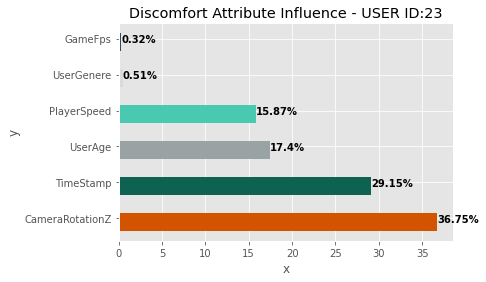

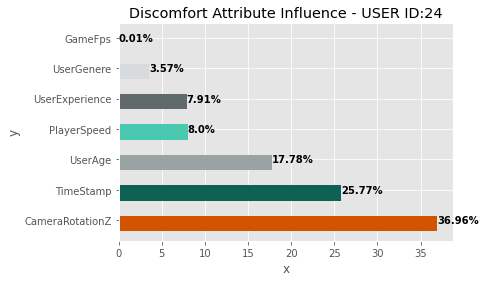

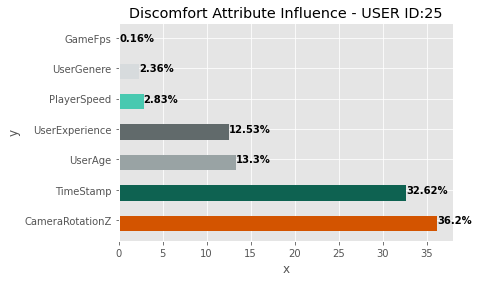

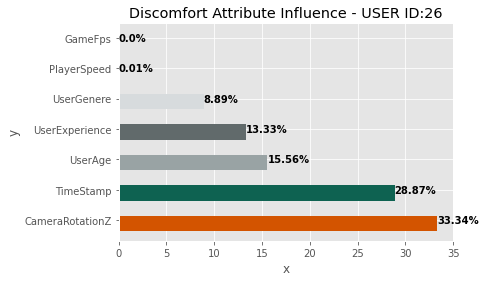

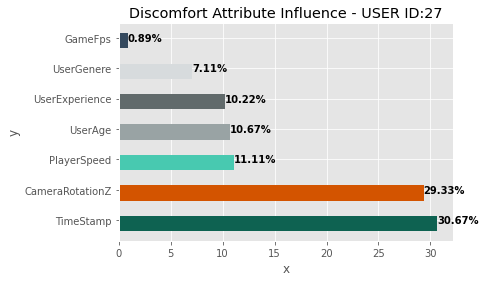

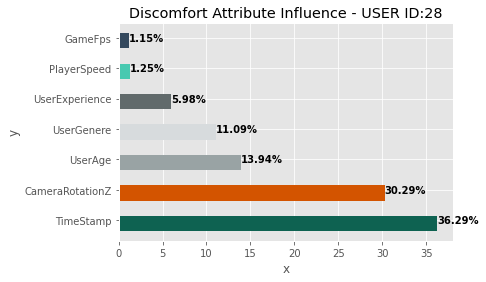

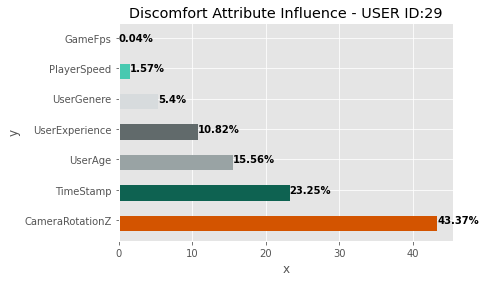

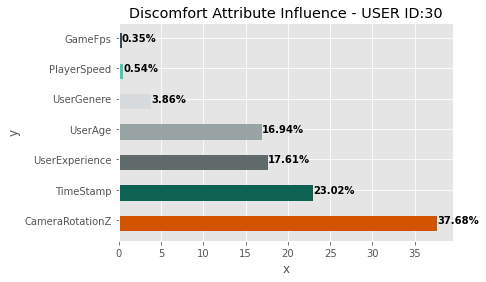

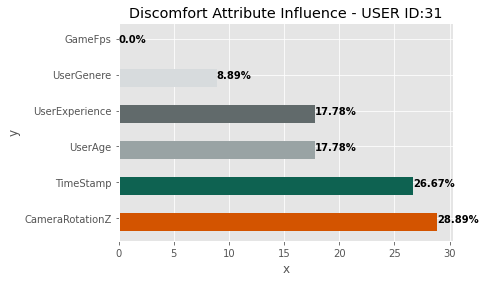

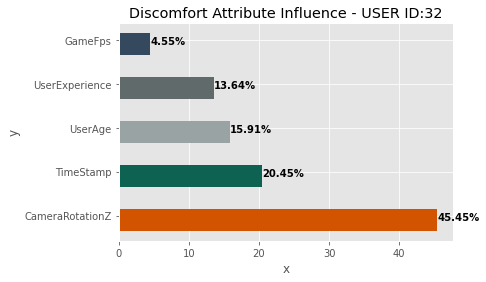

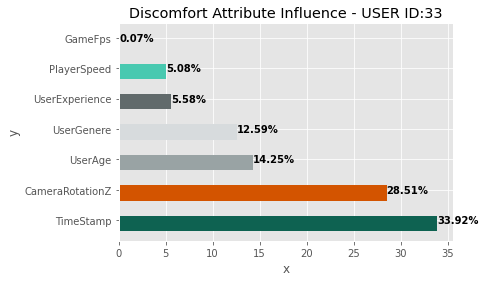

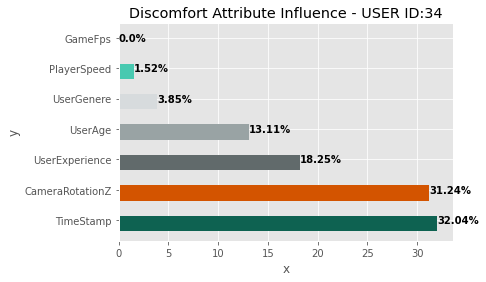

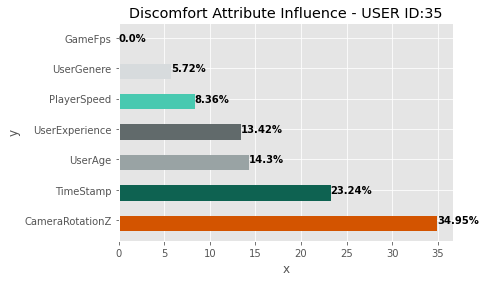

In [ ]:

databaseB = DATABASE_PASSARO
    
# PREDICAO JOGO DO PASSARO - PREDICAO DE DESCONFORTO PARA USUARIOS    
# TestUsersB = ['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20']
B = []
#features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featuresOut = []
# for userB in TestUsersB:
for userB in USERS_PASSARO:
    print(userB)
    PredictDiscomfortAndCausesFromUserOutTraining(databaseB, userB, 9,featuresOut) #USANDO A MELHOR PROFUNDIDADE DADA PELO MIN LEAF
    B.append(r)

## RF PREEICTION

A saída de streaming foi truncada nas últimas 5000 linhas.
  Discomfort Predicted by RF
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 152 of 193
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  2.600103e+02  1.500000e+01
 -7.000000e+01 -6.485781e-03  9.000000e+01]
  Discomfort Predicted by RF
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 153 of 193
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  2.610052e+02  1.500000e+01
  0.000000e+00 -1.243981e-02  8.800000e+01]
  Discomfort Predicted by RF
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 154 of 193
Sample:  [1.000000e+00 0.000000e+00 0.000000e+00 2.620099e+02 1.500000e+01
 0.000000e+00 1.251309e-02 9.000000e+01]
  Discomfort Predicted by RF
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 155 of 193
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  2.630158e+02  1.500000e+01
  0.000000e+00 -2.525378e-02  9.000000e+01]
None Disc

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


23
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 11908 , X_test =  303 , y_train = 11908 , y_test = 303 , y_pred = 303
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9221701418410027
Testing AUC: 0.759075907590759
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.759075907590759
Sample: 1 of 303
Sample:  [ 1.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  1.0000e+01  1.0000e+01
 -3.7985e-02  9.0000e+01]
None Discomfort Predicted by RF
Sample: 2 of 303
Sample:  [ 1.000000e+00  0.000000e+00  1.000000e+00  9.996499e-01  1.000000e+01
  0.000000e+00 -4.427923e-02  9.000000e+01]
None Discomfort Predict

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


24
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12394 , X_test =  302 , y_train = 12394 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9205654982165498
Testing AUC: 0.9944214876033057
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '21', '16', '27', '05']
accuracy:  0.8807947019867549
Sample: 1 of 302
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+01
  1.000000e+01 -4.114223e-03  9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  1.010902e+00  1.000000e+01
  0.000000e+00 -9.836185e-03  9.200000e+01]
None 

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


25
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 12228 , X_test =  303 , y_train = 12228 , y_test = 303 , y_pred = 303
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9183500220272354
Testing AUC: 0.6579982517482517
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.5775577557755776
Sample: 1 of 303
Sample:  [ 1.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00  1.000000e+01
  1.000000e+01 -3.875922e-03  9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 303
Sample:  [ 1.000000e+00  0.000000e+00  3.000000e+00  9.974285e-01  1.000000e+01
  0.000000e+00 -1.546155e-03  9.000000e+01]
None 

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


26
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 11908 , X_test =  303 , y_train = 11908 , y_test = 303 , y_pred = 303
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9330497536312716
Testing AUC: 0.25412541254125415
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.25412541254125415
Sample: 1 of 303
Sample:  [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+01
 1.000000e+01 3.682836e-02 9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 303
Sample:  [1.000000e+00 0.000000e+00 0.000000e+00 1.010530e+00 1.000000e+01
 0.000000e+00 3.188973e-02 9.000000e+01]
None Discomfort Pre

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


27
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11922 , X_test =  302 , y_train = 11922 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9189355594679177
Testing AUC: 0.5236486486486487
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '05']
accuracy:  0.8841059602649006
Sample: 1 of 302
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+01
  1.000000e+01 -5.949467e-02  8.800000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  9.995452e-01  1.000000e+01
  0.000000e+00 -6.446955e-02  9.000000e+01]
None 

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


28
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9298028383883887
Testing AUC: 0.10927152317880795
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.10927152317880795
Sample: 1 of 302
Sample:  [0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 1.000000e+01
 1.000000e+01 1.664147e-03 9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [ 0.000000e+00  0.000000e+00  1.000000e+00  9.993859e-01  1.000000e+01
  0.000000e+00 -8.833198e-03  9.200000e+01]
None Discom

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


29
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  303
X_train = 12348 , X_test =  303 , y_train = 12348 , y_test = 303 , y_pred = 303
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9237876602813831
Testing AUC: 0.9861993428258489
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.9636963696369637
Sample: 1 of 303
Sample:  [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+01
 1.000000e+01 8.800205e-03 9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 303
Sample:  [1.000000e+00 0.000000e+00 0.000000e+00 9.994810e-01 1.000000e+01
 0.000000e+00 1.007346e-02 9.000000e+01]
None Discomfort Predi

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


30
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9156288170232806
Testing AUC: 0.7814569536423841
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.7814569536423841
Sample: 1 of 302
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  1.114450e-02  1.000000e+01
  1.000000e+01 -1.798192e-02  9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [ 1.000000e+00  0.000000e+00  0.000000e+00  1.011174e+00  1.000000e+01
  0.000000e+00 -2.633974e-02  9.400000e+01]
None 

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


31
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 11910 , X_test =  302 , y_train = 11910 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9230129554079329
Testing AUC: 0.6788079470198676
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.6788079470198676
Sample: 1 of 302
Sample:  [1.000000e+00 0.000000e+00 1.000000e+00 1.143400e-02 1.000000e+01
 1.000000e+01 5.588493e-03 9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [ 1.000000e+00  0.000000e+00  1.000000e+00  1.015877e+00  1.000000e+01
  0.000000e+00 -6.812030e-03  9.000000e+01]
None Discomfo

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


32
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12464 , X_test =  302 , y_train = 12464 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9232608654903014
Testing AUC: 0.8687364620938628
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.08278145695364239
Sample: 1 of 302
Sample:  [ 0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+01
  1.000000e+01 -8.944455e-03  8.800000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [ 0.000000e+00  0.000000e+00  1.000000e+00  1.007934e+00  1.000000e+01
  0.000000e+00 -5.177286e-03  9.200000e+01]
None

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


33
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  295
X_train = 12486 , X_test =  295 , y_train = 12486 , y_test = 295 , y_pred = 295
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9209628318876519
Testing AUC: 0.9928825622775802
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.7762711864406779
Sample: 1 of 295
Sample:  [ 0.000000e+00  0.000000e+00  0.000000e+00  1.131510e-02  1.000000e+01
  1.000000e+01 -3.175195e-02  8.800000e+01]
None Discomfort Predicted by RF
Sample: 2 of 295
Sample:  [ 0.000000e+00  0.000000e+00  0.000000e+00  1.010173e+00  1.000000e+01
  0.000000e+00 -3.625425e-02  9.200000e+01]
None 

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


34
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 12380 , X_test =  302 , y_train = 12380 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9296881206594616
Testing AUC: 0.48853604318831373
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '35', '15', '09', '32', '23', '17', '30', '11', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.4139072847682119
Sample: 1 of 302
Sample:  [1.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 1.000000e+01
 1.000000e+01 8.390114e-03 9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [1.000000e+00 0.000000e+00 1.000000e+00 1.010808e+00 1.000000e+01
 0.000000e+00 4.940439e-03 9.200000e+01]
None Discomfort Pred

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


35
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  301
X_train = 12206 , X_test =  301 , y_train = 12206 , y_test = 301 , y_pred = 301
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9203982435018446
Testing AUC: 0.7558971640604293
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['12', '13', '18', '15', '09', '32', '23', '17', '30', '11', '34', '31', '04', '01', '28', '06', '33', '14', '25', '20', '26', '03', '22', '02', '29', '08', '07', '10', '19', '24', '21', '16', '27', '05']
accuracy:  0.7508305647840532
Sample: 1 of 301
Sample:  [ 1.000000e+00  0.000000e+00  1.000000e+00  1.148360e-02  1.000000e+01
  1.000000e+01 -4.292516e-04  8.800000e+01]
None Discomfort Predicted by RF
Sample: 2 of 301
Sample:  [ 1.000000e+00  0.000000e+00  1.000000e+00  1.010885e+00  1.000000e+01
  0.000000e+00 -2.289479e-03  9.200000e+01]
None 

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


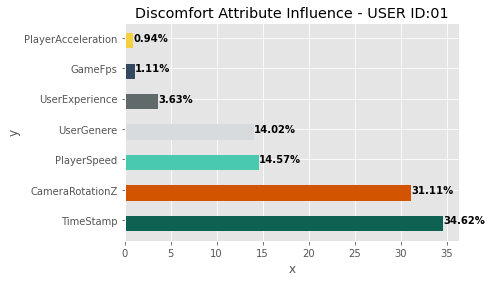

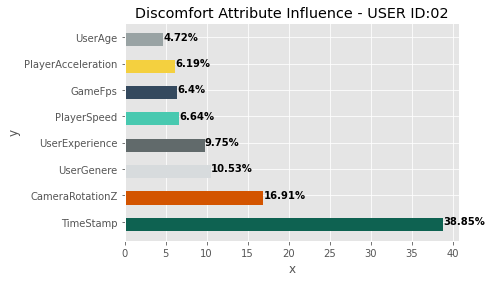

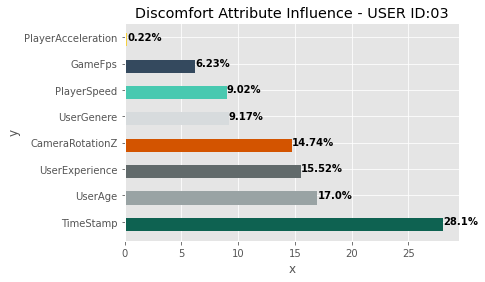

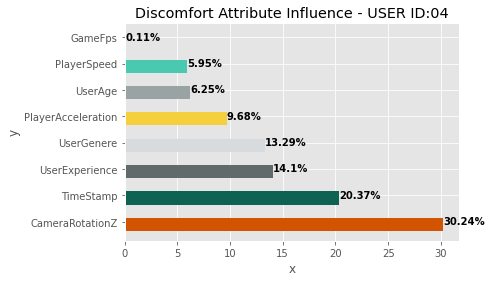

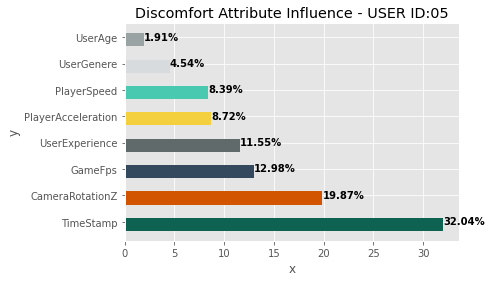

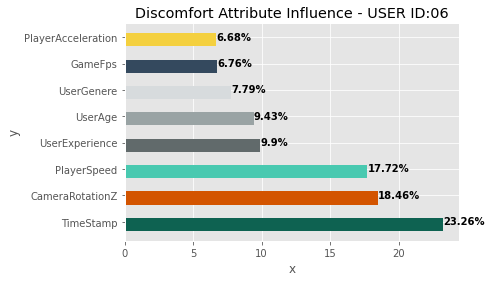

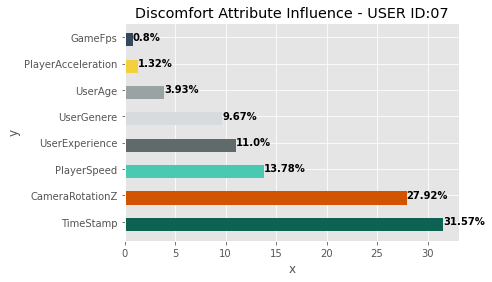

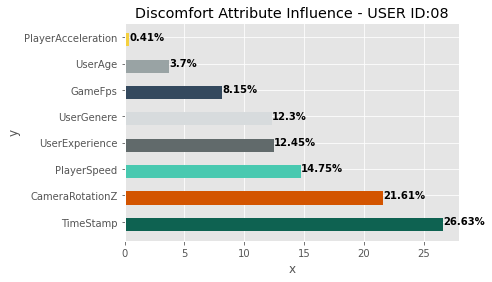

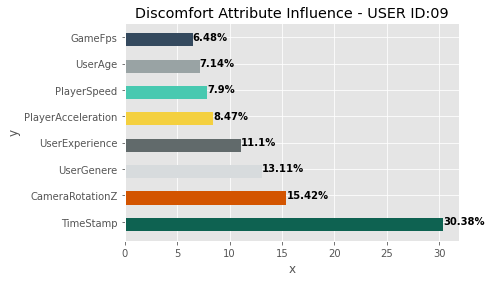

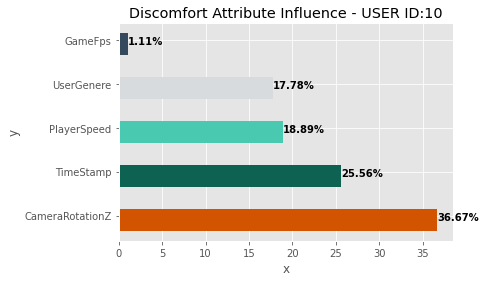

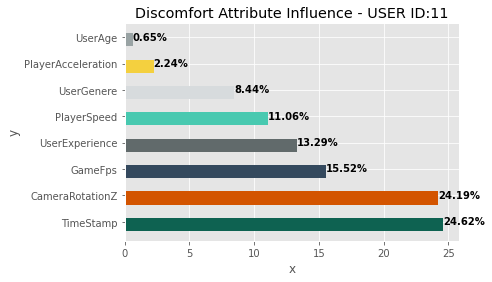

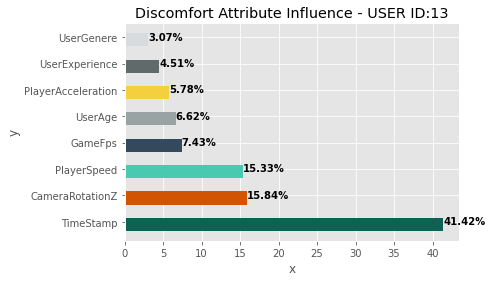

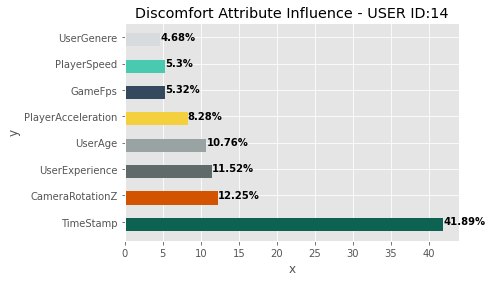

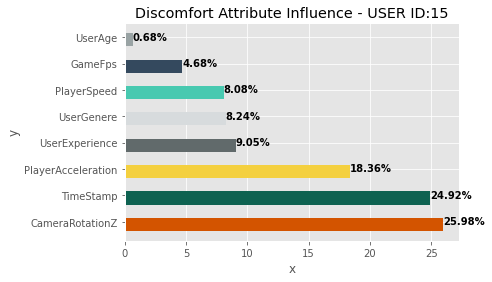

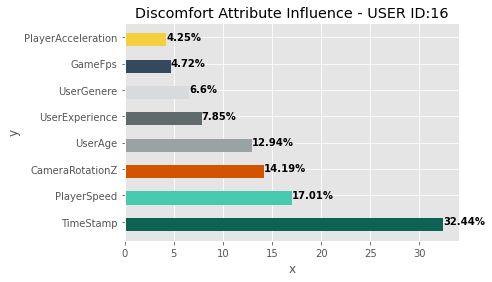

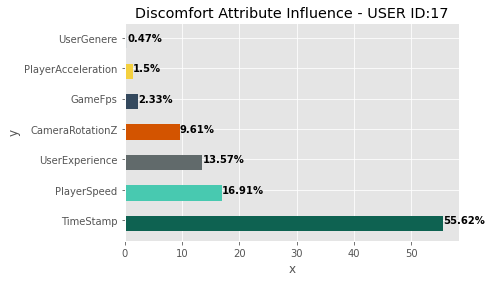

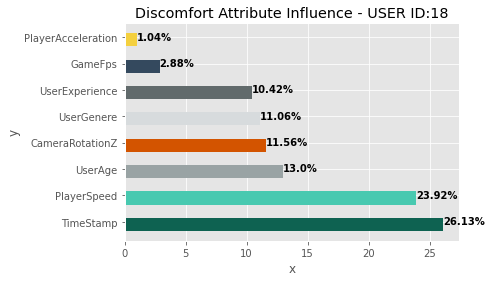

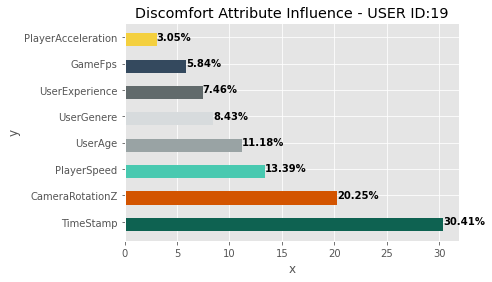

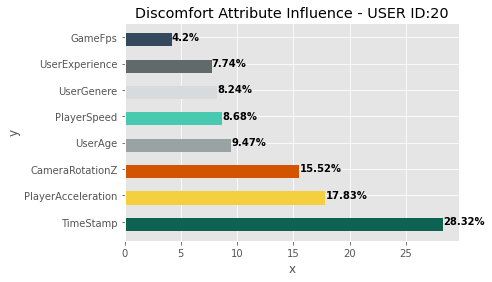

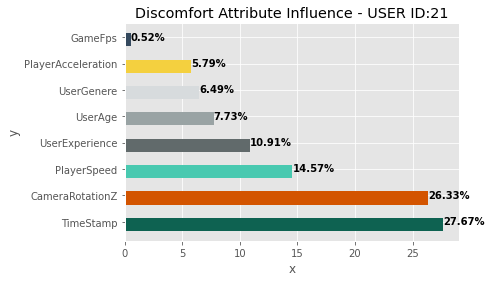

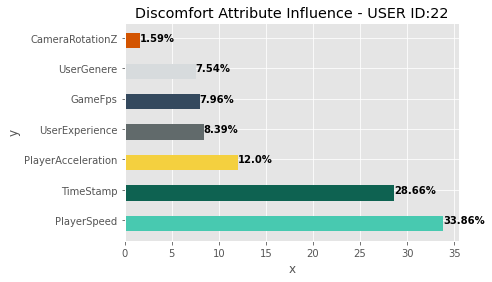

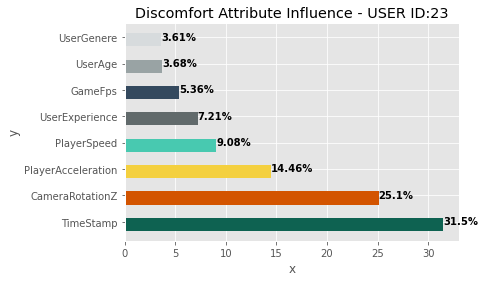

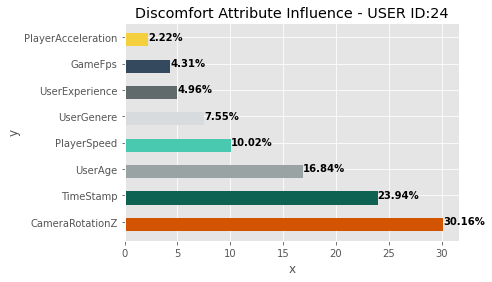

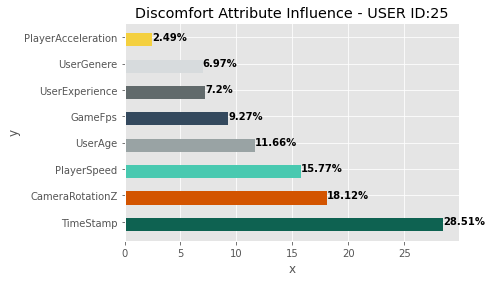

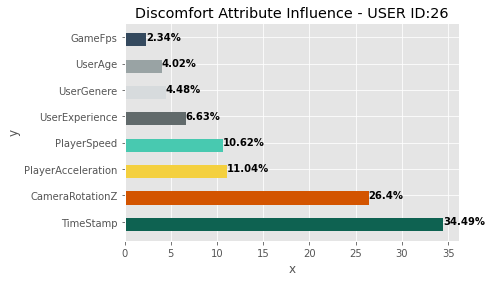

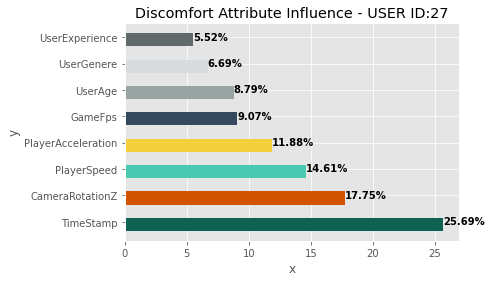

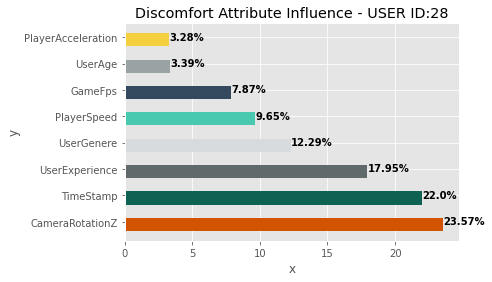

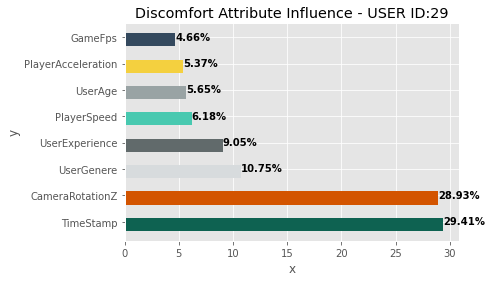

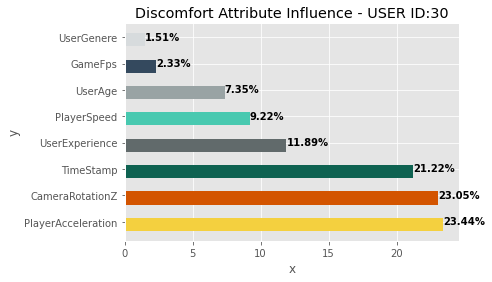

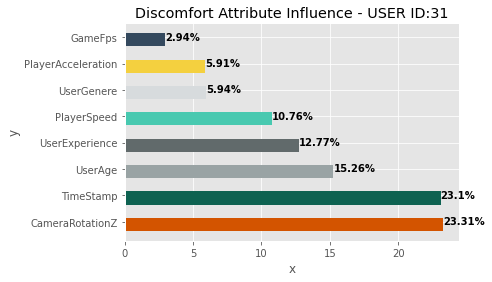

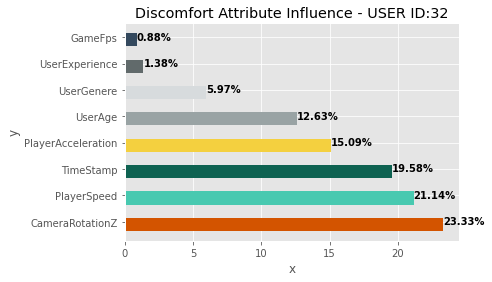

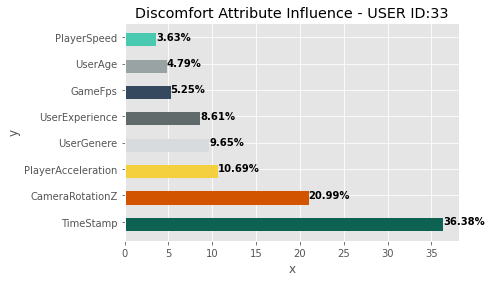

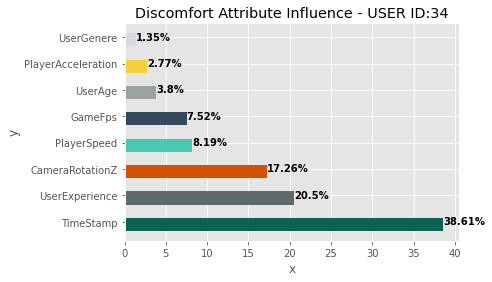

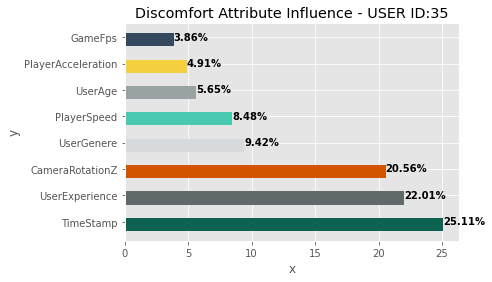

In [ ]:
databaseB = DATABASE_PASSARO
    
# PREDICAO JOGO DO PASSARO - PREDICAO DE DESCONFORTO PARA USUARIOS    
# TestUsersB = ['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20']
BRF = []
#features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featuresOut = []
# for userB in TestUsersB:
for userB in USERS_PASSARO:
    print(userB)
    r = PredictDiscomfortAndCausesFromUserOutTrainingRF(databaseB, userB, 9,featuresOut) #USANDO A MELHOR PROFUNDIDADE DADA PELO MIN LEAF
    BRF.append(r)

In [ ]:
from pandas import DataFrame

# BRF[5].style.hide_index() # Added visualization for all users

i = 0

for user in BRF:
  i+=1
  print("Usuário ", i)
  display(user.style.hide_index())
  print("\n")

Output hidden; open in https://colab.research.google.com to view.

A saída de streaming foi truncada nas últimas 5000 linhas.
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 256 of 303
Sample:  [ 1.000000e+00  0.000000e+00  1.000000e+00  2.550061e+02  1.450000e+02
  0.000000e+00 -3.461682e-02  9.000000e+01]
  Discomfort Predicted by RF
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 257 of 303
Sample:  [1.000000e+00 0.000000e+00 1.000000e+00 2.559995e+02 1.450000e+02
 0.000000e+00 4.689871e-02 8.800000e+01]
  Discomfort Predicted by RF
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 258 of 303
Sample:  [1.000000e+00 0.000000e+00 1.000000e+00 2.570051e+02 1.450000e+02
 0.000000e+00 4.836807e-02 9.000000e+01]
  Discomfort Predicted by RF
    Estimator 1 of 3
    Estimator 2 of 3
    Estimator 3 of 3
Sample: 259 of 303
Sample:  [1.000000e+00 0.000000e+00 1.000000e+00 2.579990e+02 1.450000e+02
 0.000000e+00 3.366995e-02 8.800000e+01]
  Discomfort Predicted by RF
    Estimator 1 of 3
    

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


57
User Adapt LeaveOneOut - Train:100% A, Test:100% B
number instances (B) =  302
X_train = 7982 , X_test =  302 , y_train = 7982 , y_test = 302 , y_pred = 302
Best Parameters  {'max_features': 'auto', 'n_estimators': 50}
Training AUC: 0.9920599976858481
Testing AUC: 0.8903803131991052
training(fn):  ['UserGenere', 'UserAge', 'UserExperience', 'TimeStamp', 'PlayerSpeed', 'PlayerAcceleration', 'CameraRotationZ', 'GameFps']
training(users):  ['48', '55', '51', '41', '42', '53', '39', '50', '54', '49', '40', '36', '47', '44', '56', '38', '52', '37', '43', '46', '45']
accuracy:  0.7814569536423841
Sample: 1 of 302
Sample:  [0.000000e+00 0.000000e+00 0.000000e+00 1.110610e-02 0.000000e+00
 0.000000e+00 2.001062e-02 9.000000e+01]
None Discomfort Predicted by RF
Sample: 2 of 302
Sample:  [0.000000e+00 0.000000e+00 0.000000e+00 1.009122e+00 0.000000e+00
 0.000000e+00 3.137779e-02 8.800000e+01]
None Discomfort Predicted by RF
Sample: 3 of 302
Sample:  [0.000000e+00 0.000000e+00 0.000000e+00 2.0

<ipython-input-13-0c82e5238e02>:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


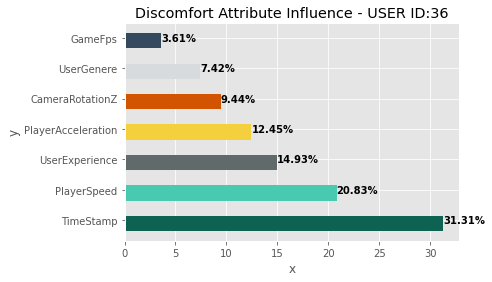

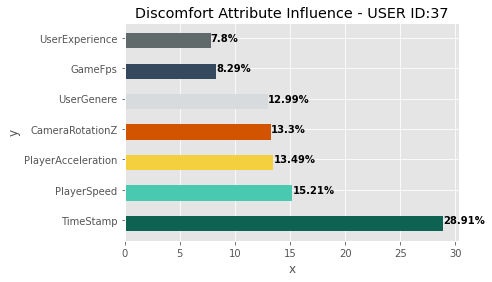

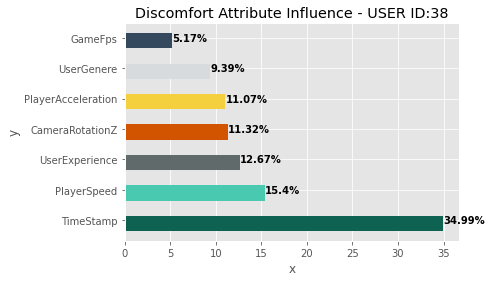

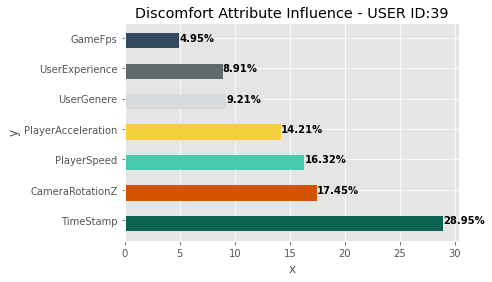

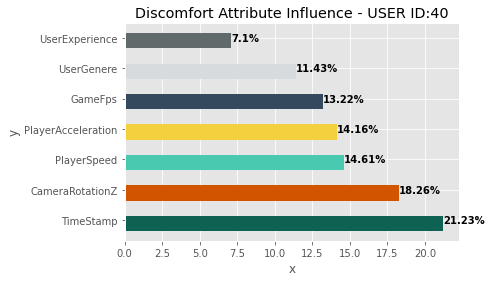

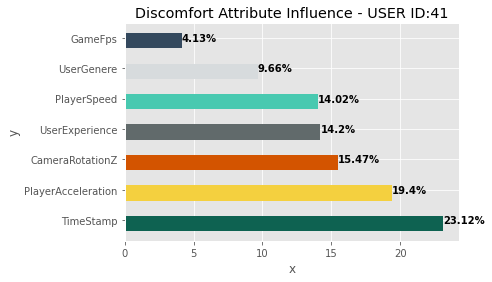

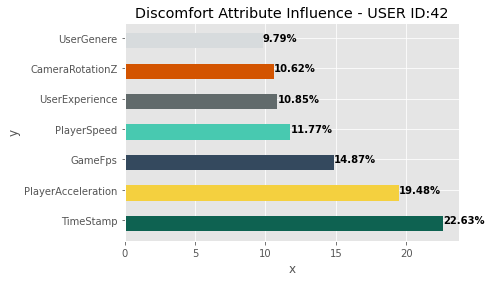

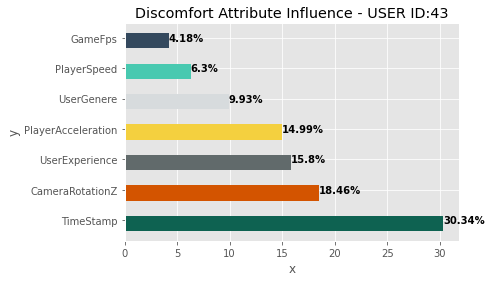

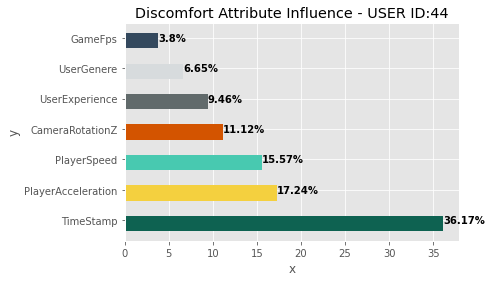

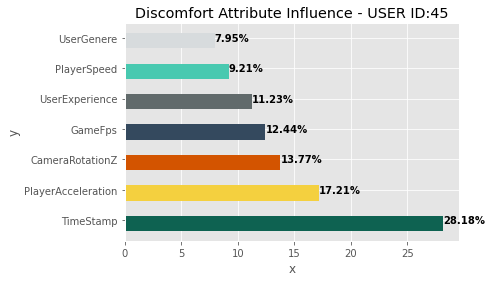

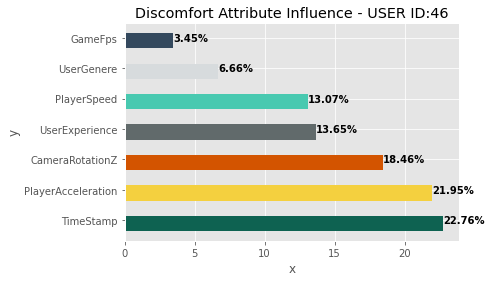

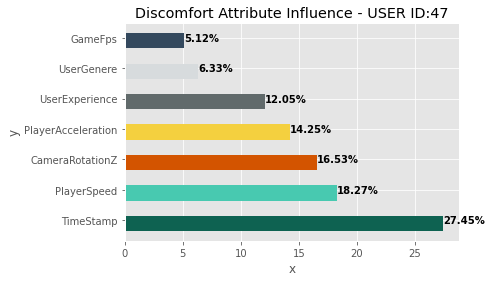

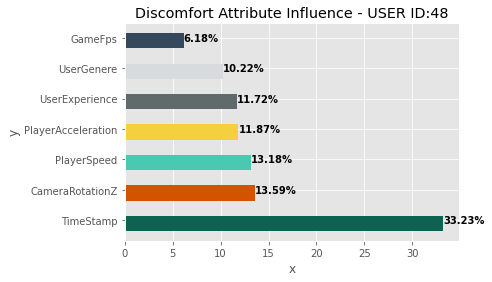

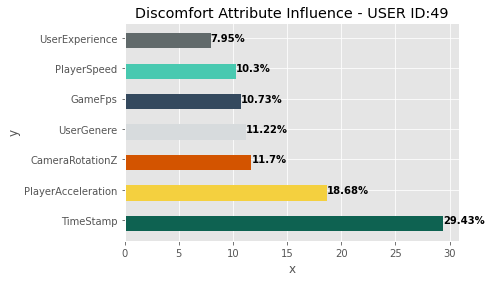

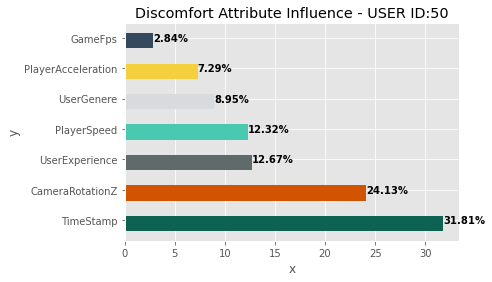

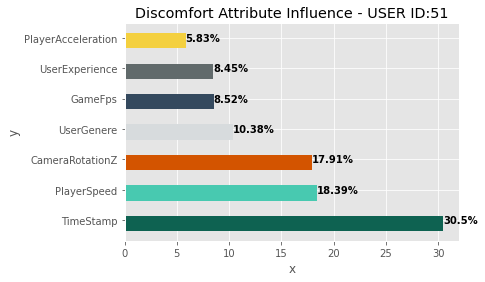

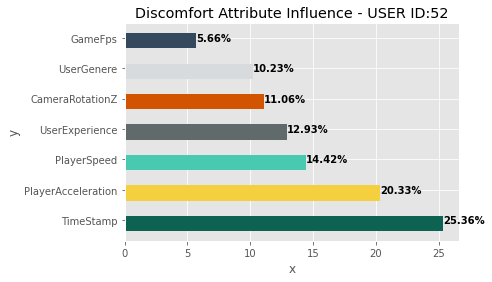

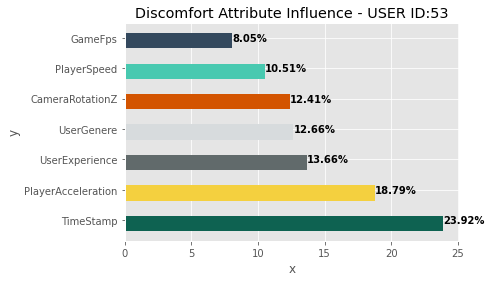

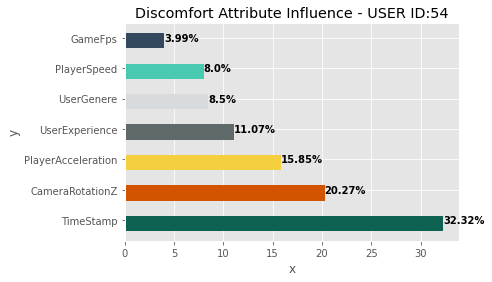

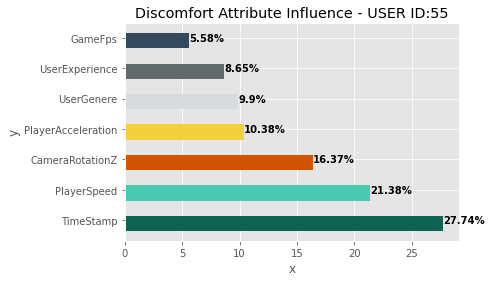

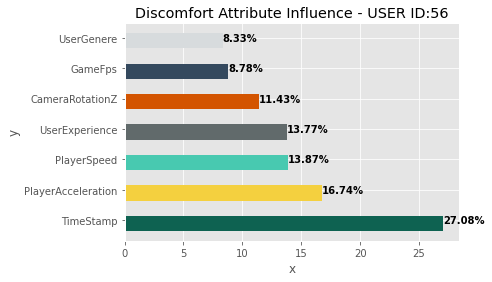

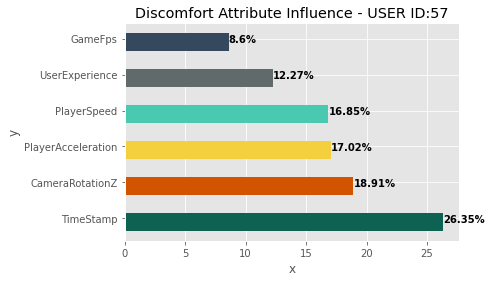

In [ ]:
databaseA = DATABASE_CARRO

# PREDICAO JOGO DO CARRO - PREDICAO DE DESCONFORTO PARA USUARIOS
# TestUsersA =  ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']
ARF = []
#features = ['UserGenere', 'UserAge', 'UserExperience','TimeStamp','PlayerSpeed','PlayerAcceleration','CameraRotationZ','GameFps']
featuresOut = []

# for userA in TestUsersA:
for userA in USERS_CARRO:
    print(userA)
    r = PredictDiscomfortAndCausesFromUserOutTrainingRF(databaseA, userA, 13, featuresOut) #USANDO A MELHOR PROFUNDIDADE DADA PELO MIN LEAF
    ARF.append(r)

In [ ]:
# ARF[0] # Added visualization for all users

# i = 35

for user in ARF:
  i+=1
  print("Usuário ", i)
  display(user.style.hide_index())
  print("\n")

Usuário  1




Usuário  2




Usuário  3




Usuário  4




Usuário  5




Usuário  6




Usuário  7




Usuário  8




Usuário  9




Usuário  10




Usuário  11




Usuário  12




Usuário  13




Usuário  14




Usuário  15




Usuário  16




Usuário  17




Usuário  18




Usuário  19




Usuário  20




Usuário  21




Usuário  22
